In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_csv('database for IFT.csv')

In [3]:
df.sample(10)

Surfactant name        Type of Surfactant  EACN Oil  Salinity ppm  \
161     ALFOTERRA L145-8S                   Anionic      10.0       1000.00   
62          SOLOTERRA 961                   Anionic       6.0      10000.00   
47         TERRAVIS KK3-4                  Nonionic      18.0      10000.00   
98      ALFOTERRA S23-13S                   Anionic       6.0       2997.97   
107           TERRAVIS S9                  Nonionic       6.0       2997.97   
160     ALFOTERRA S23-13S                   Anionic      10.0       1000.00   
83                    01A  Anionic-Nonionic Mixture      25.2       9993.24   
165         TERRAVIS K163                  Nonionic      10.0       1000.00   
32   ALFOTERRA 123-8S 90M                   Anionic      18.0      10000.00   
84                    01B  Anionic-Nonionic Mixture      25.2       9993.24   

     Salinity mEq/mL  Temp  Conc Surf Hydrophilic Type  \
161           0.0171    70        2.0          Sulfate   
62            0.1711    50        2.0        Sulfonate   
47            0.1711    50        2.0       Ethoxylate   
98            0.0513    30        2.0          Sulfate   
107           0.0513    30        2.0       Ethoxylate   
160           0.0171    70        2.0          Sulfate   
83            0.1710    63        2.0  Sulfonate-Ester   
165           0.0171    70        2.0       Ethoxylate   
32            0.1711    50        2.0          Sulfate   
84            0.1710    63        1.5  Sulfonate-Ester   

     Hydrophobic Num of Surf  Hydrophilic MW g/mol     IFT  \
161                     14.0                 96.06  0.0531   
62                      12.5                 81.00  0.3000   
47                      13.0                176.00  0.0400   
98                      12.5                 96.06  0.0690   
107                     13.5                396.00  0.0758   
160                     12.5                 96.06  0.0210   
83                      18.0                308.00  0.0032   
165                     16.0                132.00  0.0831   
32                      10.0                 96.06  0.1000   
84                      18.0                308.00  0.4050   

     Oil Solubilization Ratio  Water Solubilization Ratio  
161                     2.830                       50.00  
62                      3.130                        2.08  
47                     20.410                        1.02  
98                      0.943                        0.57  
107                     0.200                        0.20  
160                     9.620                       50.00  
83                      0.980                        7.84  
165                    58.330                        4.17  
32                     15.000                        0.00  
84                      5.000                       21.77

In [4]:
# Re-arrange column (target 'IFT' at the end --> personal preference)
df_1 = df.drop(columns='IFT')
df_2 = df['IFT']
df = pd.concat([df_1, df_2], axis='columns')

In [5]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 170
Number of columns 13


In [6]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage (%)  \
0              Surfactant name     object             0                   0.0   
1           Type of Surfactant     object             0                   0.0   
2                     EACN Oil    float64             0                   0.0   
3                 Salinity ppm    float64             0                   0.0   
4              Salinity mEq/mL    float64             0                   0.0   
5                         Temp      int64             0                   0.0   
6                    Conc Surf    float64             0                   0.0   
7             Hydrophilic Type     object             0                   0.0   
8      Hydrophobic Num of Surf    float64             0                   0.0   
9         Hydrophilic MW g/mol    float64             0                   0.0   
10    Oil Solubilization Ratio    float64             0                   0.0   
11  Water Solubilization Ratio    float64             0                   0.0   
12                         IFT    float64             0                   0.0   

     Duplicated Values   Unique Values  \
0                    0              47   
1                    0               3   
2                    0               5   
3                    0              10   
4                    0               9   
5                    0               4   
6                    0              10   
7                    0               6   
8                    0              12   
9                    0              12   
10                   0             120   
11                   0              88   
12                   0             104   

                                                              5 Unique Sample  
0   [SOLOTERRA 961, SOLOTERRA 925, SOLOTERRA 981, SOLOTERRA 982, TERRAVIS S9]  
1                               [Anionic, Nonionic, Anionic-Nonionic Mixture]  
2                                               [12.0, 18.0, 6.0, 10.0, 25.2]  
3                                 [10000.0, 9993.24, 5000.0, 3000.0, 2997.97]  
4                                     [0.1711, 0.171, 0.0856, 0.0513, 0.0438]  
5                                                            [50, 63, 70, 30]  
6                                                   [1.5, 2.0, 0.5, 1.0, 2.5]  
7        [Sulfonate, Ethoxylate, Sulfate, Ethoxycarboxylate, Sulfonate-Ester]  
8                                               [12.5, 13.5, 13.0, 10.0, 7.0]  
9                                          [81.0, 396.0, 264.0, 352.0, 96.06]  
10                                           [1.33, 6.12, 100.0, 128.0, 44.0]  
11                                            [2.67, 1.02, 2.0, 100.0, 200.0]  
12                                               [0.1, 0.2, 0.09, 0.005, 0.3]

Dataset tidak ada cacat dalam hal format data type, null values, maupun duplicated values.

In [7]:
df.select_dtypes(exclude=['object']).columns

Index(['EACN Oil', 'Salinity ppm', 'Salinity mEq/mL', 'Temp', 'Conc Surf',
       'Hydrophobic Num of Surf', 'Hydrophilic MW g/mol',
       'Oil Solubilization Ratio', 'Water Solubilization Ratio', 'IFT'],
      dtype='object')

In [8]:
# Grouping columns based on data types
nums_cols = ['EACN Oil', 'Salinity ppm', 'Salinity mEq/mL', 'Temp', 'Conc Surf',
            'Hydrophobic Num of Surf', 'Hydrophilic MW g/mol',
            'Oil Solubilization Ratio', 'Water Solubilization Ratio', 'IFT']

cats_cols = ['Surfactant name', 'Type of Surfactant', 'Hydrophilic Type']

- Categorical (Nominal) columns (10 columns): 
    - `EACN Oil, Salinity ppm, Salinity mEq/mL, Temp, Conc Surf, Hydrophobic Num of Surf, Hydrophilic MW g/mol, IFT, Oil Solubilization Ratio, Water Solubilization Ratio`

- Numerical (Continuous) columns (3 columns) :

    - `Daily Time Spent on Site, Age, Area Income, Daily Internet Usage`

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Statistical Summary

In [9]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary

count         mean          std          min  \
EACN Oil                    170.0    14.936471     7.188565     6.000000   
Salinity ppm                170.0  6309.078471  3822.271767  1000.000000   
Salinity mEq/mL             170.0     0.107947     0.065402     0.017100   
Temp                        170.0    55.752941    10.247708    30.000000   
Conc Surf                   170.0     1.838235     0.771828     0.250000   
Hydrophobic Num of Surf     170.0    15.972353     7.867934     7.000000   
Hydrophilic MW g/mol        170.0   141.047059    93.123854    44.000000   
Oil Solubilization Ratio    170.0    20.603871    31.684441     0.000000   
Water Solubilization Ratio  170.0    14.835294    30.649173     0.000000   
IFT                         170.0     0.402946     0.787525     0.000529   

                                    25%       50%          75%         max  \
EACN Oil                      10.000000    12.000     25.20000     25.2000   
Salinity ppm                2512.920000  9993.240  10000.00000  10000.0000   
Salinity mEq/mL                0.043000     0.171      0.17110      0.1711   
Temp                          50.000000    50.000     63.00000     70.0000   
Conc Surf                      1.500000     2.000      2.00000      5.0000   
Hydrophobic Num of Surf       12.500000    13.000     18.00000     42.4000   
Hydrophilic MW g/mol          81.000000    96.060    176.00000    396.0000   
Oil Solubilization Ratio       2.000000     7.645     28.69750    196.0000   
Water Solubilization Ratio     1.005000     3.885      9.75000    200.0000   
IFT                            0.025575     0.090      0.31575      4.0000   

                                  range  coefficient of variation  
EACN Oil                      19.200000                  0.481276  
Salinity ppm                9000.000000                  0.605837  
Salinity mEq/mL                0.154000                  0.605868  
Temp                          40.000000                  0.183806  
Conc Surf                      4.750000                  0.419875  
Hydrophobic Num of Surf       35.400000                  0.492597  
Hydrophilic MW g/mol         352.000000                  0.660233  
Oil Solubilization Ratio     196.000000                  1.537791  
Water Solubilization Ratio   200.000000                  2.065963  
IFT                            3.999471                  1.954419

In [10]:
# Categorical columns
cats_summary = df[cats_cols].describe().transpose()

cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

cats_summary

count unique            top freq                    bottom  \
Surfactant name      170     47  SOLOTERRA 981    8            SOLOTERRA 924    
Type of Surfactant   170      3        Anionic  111  Anionic-Nonionic Mixture   
Hydrophilic Type     170      6      Sulfonate   55         Ethoxycarboxylate   

                    freq_bottom  
Surfactant name               1  
Type of Surfactant           23  
Hydrophilic Type              2

## Univariate Analysis

### Numerical

In [11]:
len(nums_cols)

10

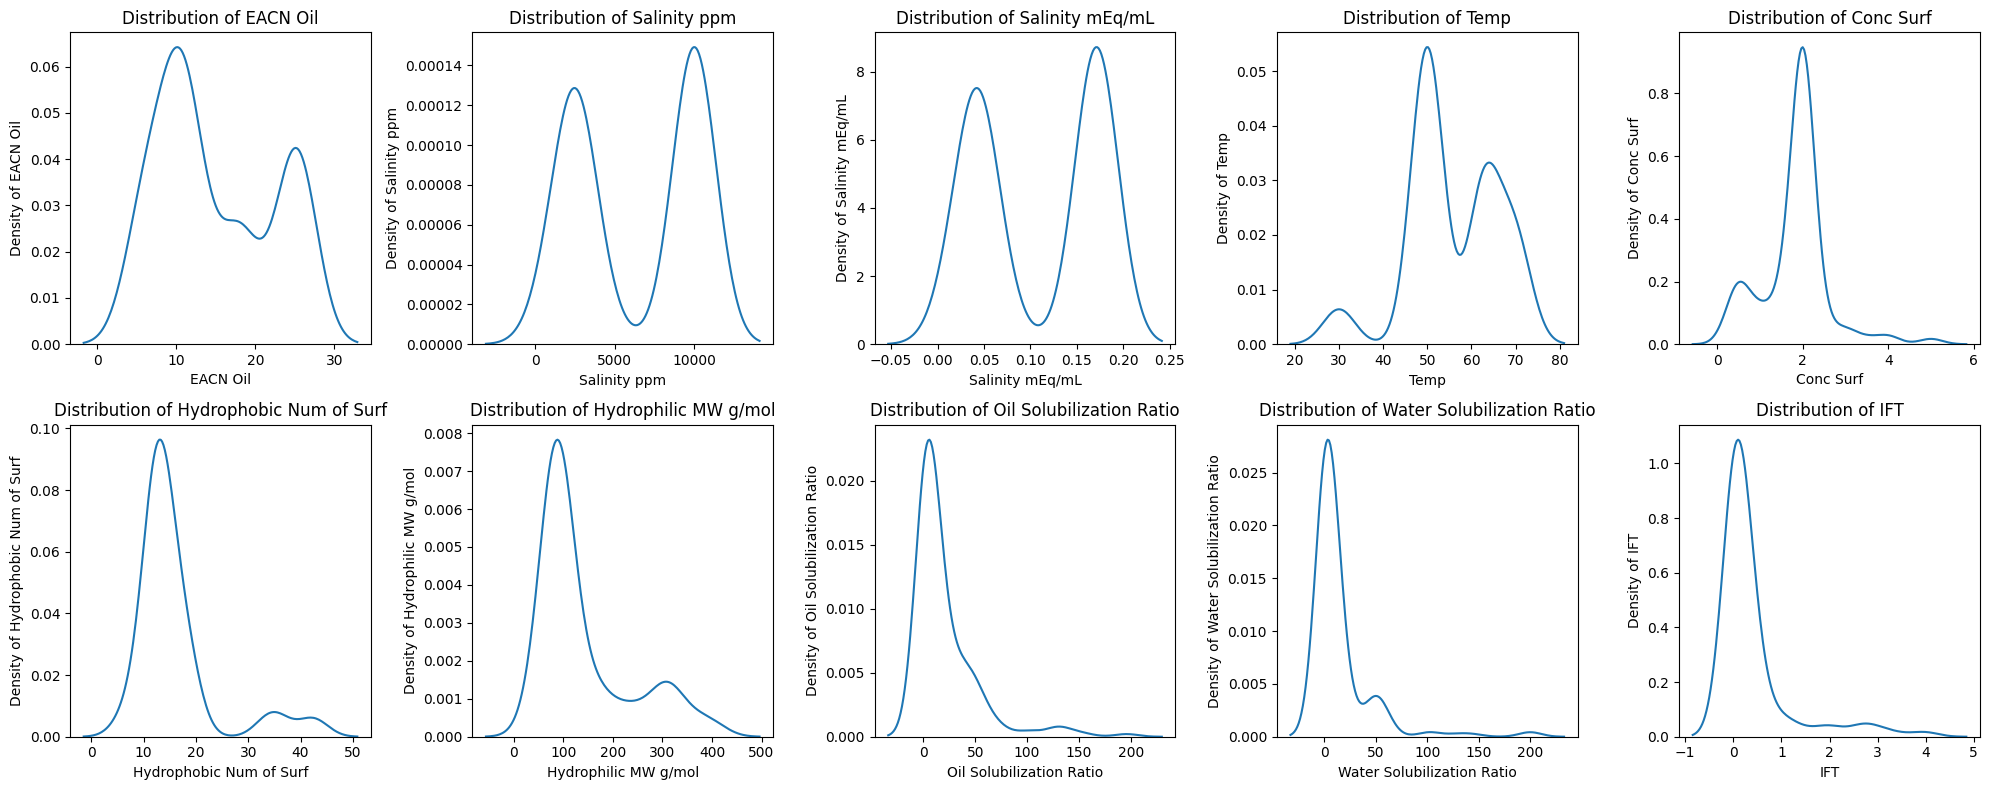

In [12]:
# Kdeplot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.kdeplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Density of {col}')
    ax[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [13]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Salinity ppm', 'Salinity mEq/mL']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis  \
0                    EACN Oil     0.373    -1.371   
1                Salinity ppm    -0.097    -1.925   
2             Salinity mEq/mL    -0.097    -1.925   
3                        Temp    -0.472     0.138   
4                   Conc Surf     0.647     3.252   
5     Hydrophobic Num of Surf     2.269     4.398   
6        Hydrophilic MW g/mol     1.382     0.557   
7    Oil Solubilization Ratio     2.762     8.896   
8  Water Solubilization Ratio     3.781    16.894   
9                         IFT     2.802     7.407   

                         Type of Distribution  
0  Moderately Normal Distribution (Symmetric)  
1                        Bimodal Distribution  
2                        Bimodal Distribution  
3  Moderately Normal Distribution (Symmetric)  
4                Moderately Positively Skewed  
5                    Highly Positively Skewed  
6                    Highly Positively Skewed  
7                    Highly Positively Skewed  
8                    Highly Positively Skewed  
9                    Highly Positively Skewed

Distribution types of each numerical column can be seen in above dataframe.

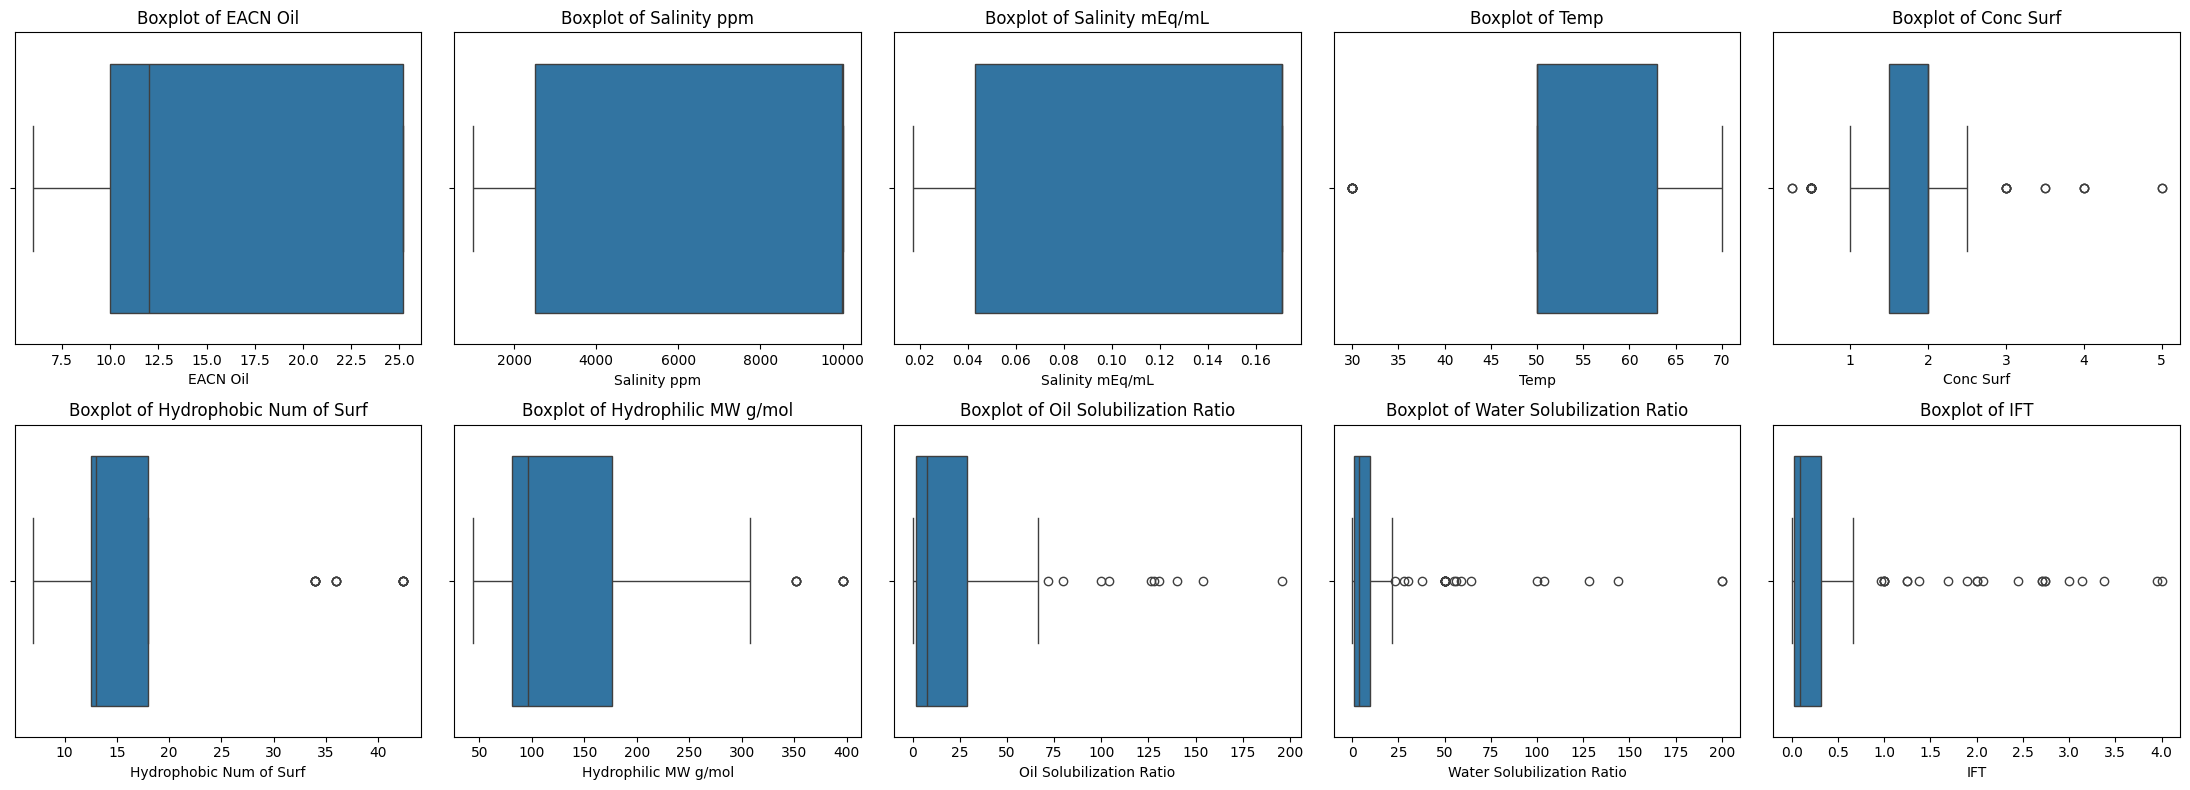

In [14]:
# Boxplot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(22, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Some of the columns have outliers, but not sure yet whether I should filter them or not since I don't really understand the context or domain importance of the columns. So as for now we will keep just keep it that way. If we need to filter them out then we will be using the code of filtering in data processing

In [15]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 170
Amount of Outlier Rows : 84
Amount of Non-Outlier Rows : 86
Percentage of Outliers : 49.41



Column Name  Outlier Exist  Lower Limit   Upper Limit  \
0                    EACN Oil          False   -12.800000     48.000000   
1                Salinity ppm          False -8717.700000  21230.620000   
2             Salinity mEq/mL          False    -0.149150      0.363250   
3                        Temp           True    30.500000     82.500000   
4                   Conc Surf           True     0.750000      2.750000   
5     Hydrophobic Num of Surf           True     4.250000     26.250000   
6        Hydrophilic MW g/mol           True   -61.500000    318.500000   
7    Oil Solubilization Ratio           True   -38.046250     68.743750   
8  Water Solubilization Ratio           True   -12.112500     22.867500   
9                         IFT           True    -0.409687      0.751012   

   Outlier Data  Non-Outlier Data  Percentage of Outlier  
0             0               170               0.000000  
1             0               170               0.000000  
2             0               170               0.000000  
3            10               160               5.882353  
4            34               136              20.000000  
5            17               153              10.000000  
6             9               161               5.294118  
7            10               160               5.882353  
8            28               142              16.470588  
9            23               147              13.529412

### Categorical

In [16]:
len(cats_cols)

3

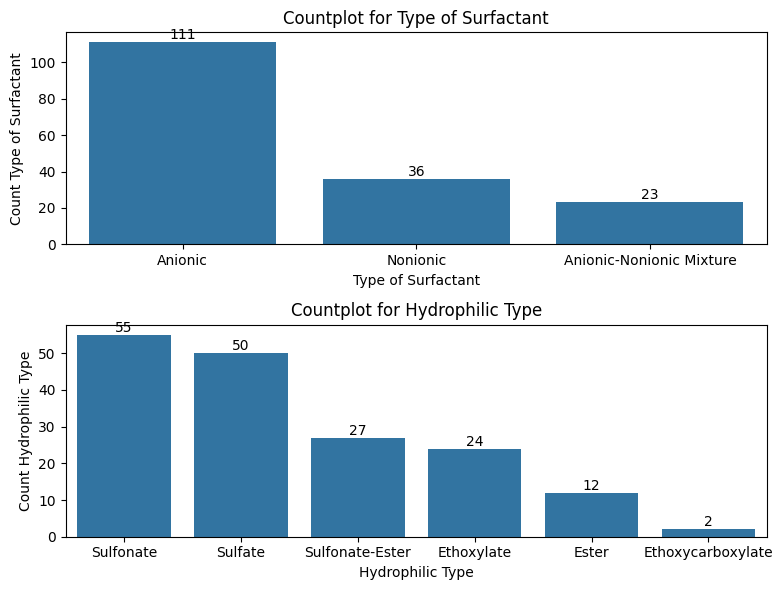

In [17]:
# Categorical Countplot (only for Type of Surfactant and Hydrophilic Type)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
ax = ax.flatten()

cats_cols_few = ['Type of Surfactant', 'Hydrophilic Type']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].set_xlabel = None
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

plt.tight_layout()
plt.show()

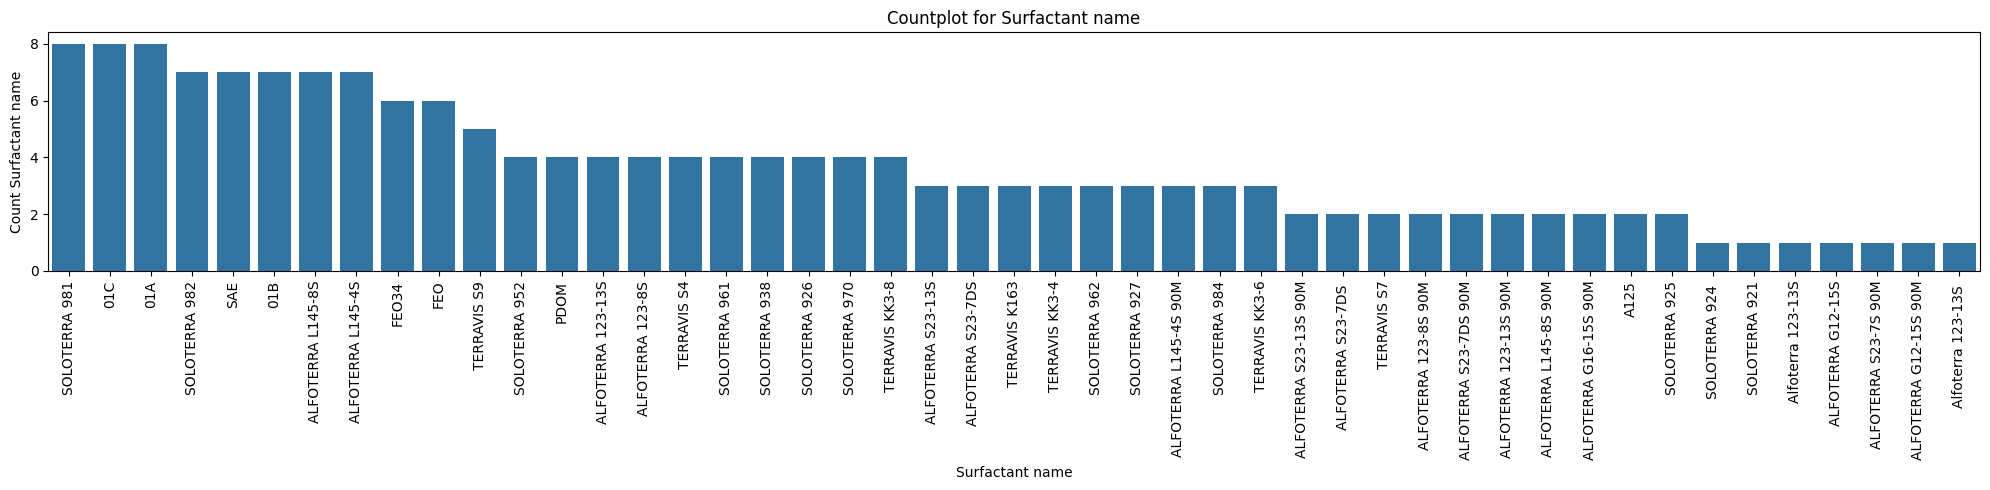

In [18]:
# Categorical Countplot (for Surfactant name)
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x="Surfactant name", order=df["Surfactant name"].value_counts().index)
plt.title(f"Countplot for Surfactant name")
plt.ylabel("Count Surfactant name")
plt.tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

## Multivariate Analysis

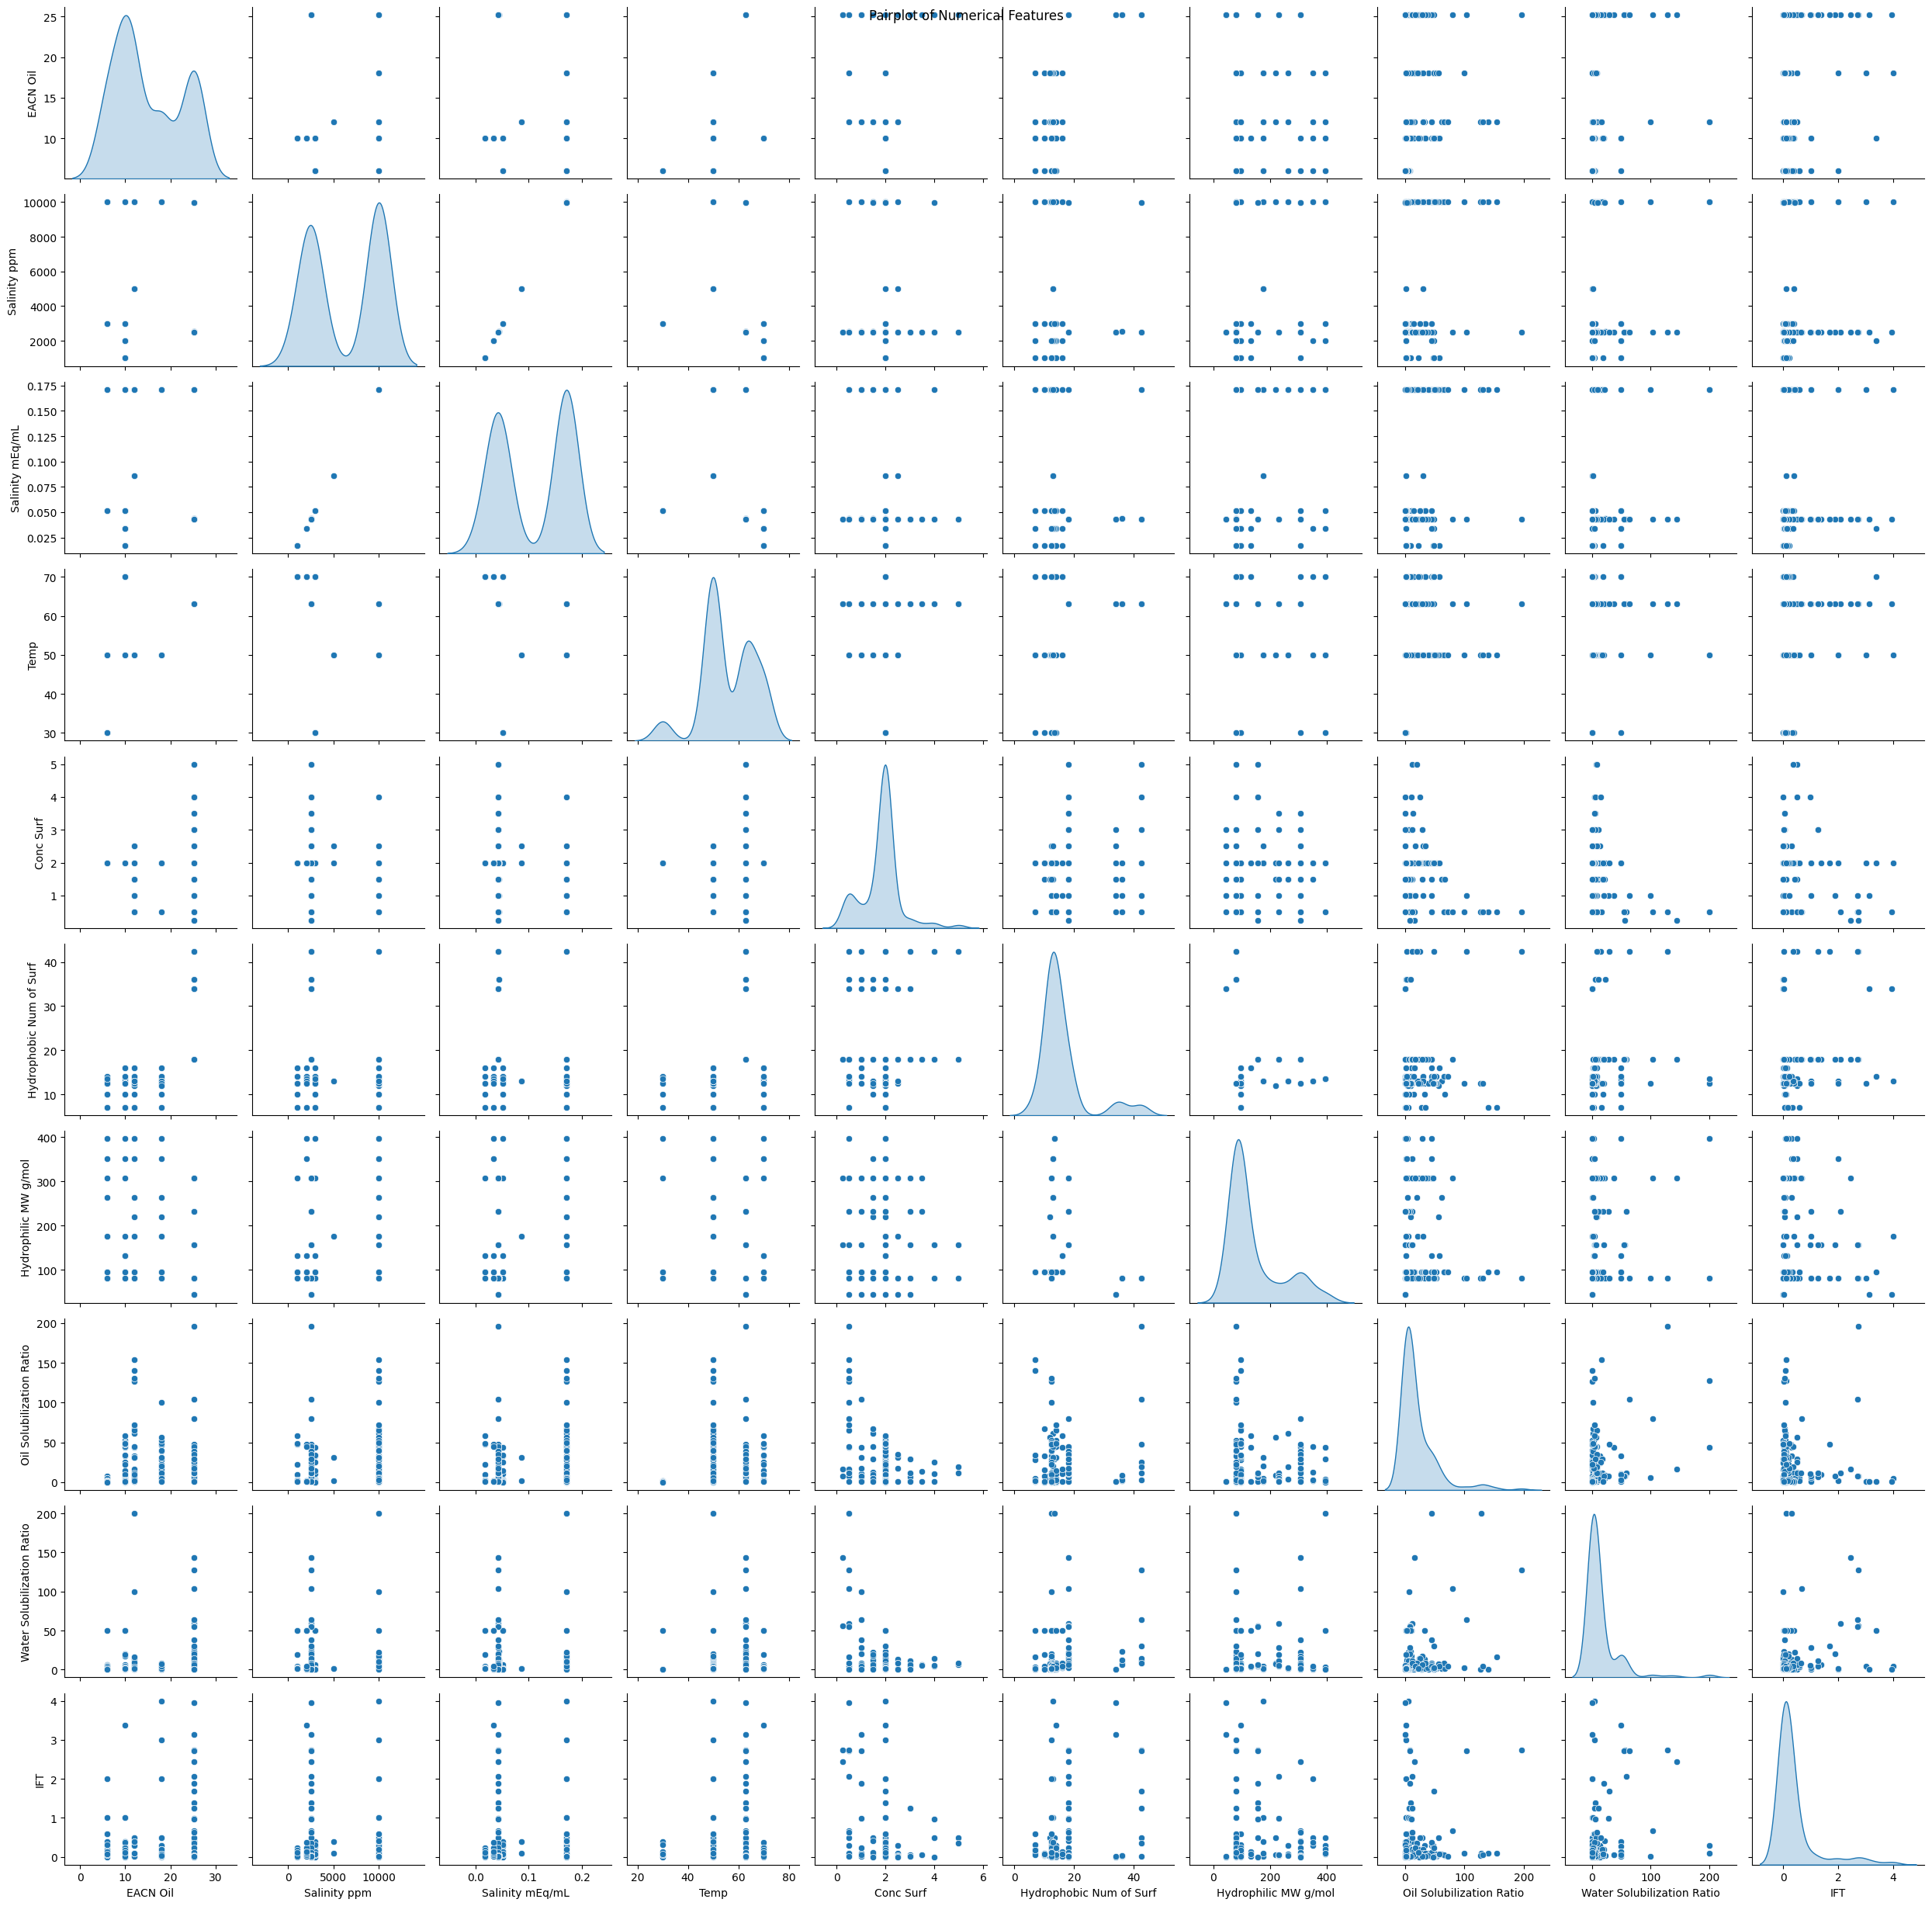

In [19]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

Mostly the relation are non-linear, so we will be using spearmann or kendall method to check the correlation value.

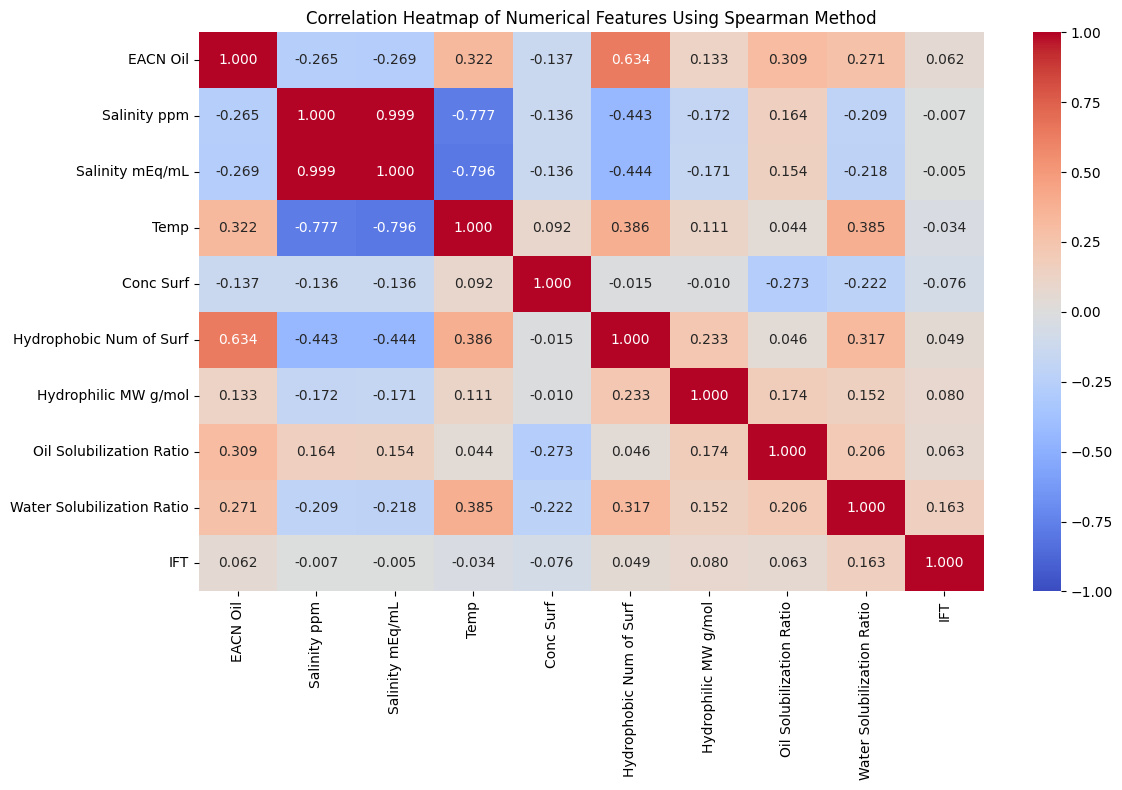

In [20]:
# Heatmap of numerical values (Spearman method)
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

plt.figure(figsize=(12, 8))
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features Using Spearman Method')

# sns.heatmap(data=df.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1, ax=ax[1])
# ax[1].set_title('Correlation Heatmap of Numerical Features Using Kendall Method')

plt.tight_layout()
plt.show()

In [21]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'IFT') & (flat_cm['B'] != 'IFT')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)
redundan_cm

A                           B  Corr Value  \
0              Salinity mEq/mL                Salinity ppm    0.999406   
1                         Temp             Salinity mEq/mL    0.796364   
2                         Temp                Salinity ppm    0.776752   
3                     EACN Oil     Hydrophobic Num of Surf    0.633843   
4              Salinity mEq/mL     Hydrophobic Num of Surf    0.444450   
5                 Salinity ppm     Hydrophobic Num of Surf    0.443227   
6      Hydrophobic Num of Surf                        Temp    0.386427   
7   Water Solubilization Ratio                        Temp    0.385174   
8                         Temp                    EACN Oil    0.321668   
9      Hydrophobic Num of Surf  Water Solubilization Ratio    0.317070   
10                    EACN Oil    Oil Solubilization Ratio    0.308991   
11    Oil Solubilization Ratio                   Conc Surf    0.272729   
12  Water Solubilization Ratio                    EACN Oil    0.271255   
13             Salinity mEq/mL                    EACN Oil    0.269028   
14                Salinity ppm                    EACN Oil    0.264544   
15        Hydrophilic MW g/mol     Hydrophobic Num of Surf    0.232510   
16                   Conc Surf  Water Solubilization Ratio    0.221651   
17             Salinity mEq/mL  Water Solubilization Ratio    0.218338   
18                Salinity ppm  Water Solubilization Ratio    0.208559   
19    Oil Solubilization Ratio  Water Solubilization Ratio    0.206346   
20        Hydrophilic MW g/mol    Oil Solubilization Ratio    0.174407   
21                Salinity ppm        Hydrophilic MW g/mol    0.172133   
22             Salinity mEq/mL        Hydrophilic MW g/mol    0.170744   
23    Oil Solubilization Ratio                Salinity ppm    0.163519   
24             Salinity mEq/mL    Oil Solubilization Ratio    0.153935   
25  Water Solubilization Ratio        Hydrophilic MW g/mol    0.151814   
26                   Conc Surf                    EACN Oil    0.136789   
27                   Conc Surf             Salinity mEq/mL    0.136206   
28                Salinity ppm                   Conc Surf    0.136125   
29                    EACN Oil        Hydrophilic MW g/mol    0.132556   
30                        Temp        Hydrophilic MW g/mol    0.111352   
31                   Conc Surf                        Temp    0.092393   
32    Oil Solubilization Ratio     Hydrophobic Num of Surf    0.046331   
33    Oil Solubilization Ratio                        Temp    0.043731   
34                   Conc Surf     Hydrophobic Num of Surf    0.014757   
35        Hydrophilic MW g/mol                   Conc Surf    0.010113   

   Corr Type  
0   Positive  
1   Negative  
2   Negative  
3   Positive  
4   Negative  
5   Negative  
6   Positive  
7   Positive  
8   Positive  
9   Positive  
10  Positive  
11  Negative  
12  Positive  
13  Negative  
14  Negative  
15  Positive  
16  Negative  
17  Negative  
18  Negative  
19  Positive  
20  Positive  
21  Negative  
22  Negative  
23  Positive  
24  Positive  
25  Positive  
26  Negative  
27  Negative  
28  Negative  
29  Positive  
30  Positive  
31  Positive  
32  Positive  
33  Positive  
34  Negative  
35  Negative

In [22]:
# Feature-Target correlation representation in tabular form 
corr_target = df.corrwith(df['IFT'], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "IFT"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr

Feature  Corr Value Corr Type
0  Water Solubilization Ratio    0.162793  Positive
1        Hydrophilic MW g/mol    0.080122  Positive
2                   Conc Surf    0.075688  Negative
3    Oil Solubilization Ratio    0.062938  Positive
4                    EACN Oil    0.062166  Positive
5     Hydrophobic Num of Surf    0.049055  Positive
6                        Temp    0.033610  Negative
7                Salinity ppm    0.007208  Negative
8             Salinity mEq/mL    0.005287  Negative

**Additional Information About Cramér's V**

Cramér's V is a measure of association between two categorical variables. It is an extension of the chi-square (χ²) test for independence and provides a way to quantify the strength of the association between categorical variables. Cramér's V ranges from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.

The formula for Cramér's V is:

\[ V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}} \]

Where:
- \( \chi^2 \) is the chi-square statistic obtained from the contingency table,
- \( n \) is the total number of observations,
- \( k \) is the number of categories in one variable, and
- \( r \) is the number of categories in the other variable.

Cramér's V is commonly used for square contingency tables, but it can be applied to rectangular tables as well. It is particularly useful when dealing with nominal categorical variables and helps assess the strength of association between them. Keep in mind that Cramér's V is sensitive to table size, so its interpretation should be done with consideration of the specific context and domain knowledge.

Other references for categorical correlation : https://www.statology.org/correlation-between-categorical-variables/

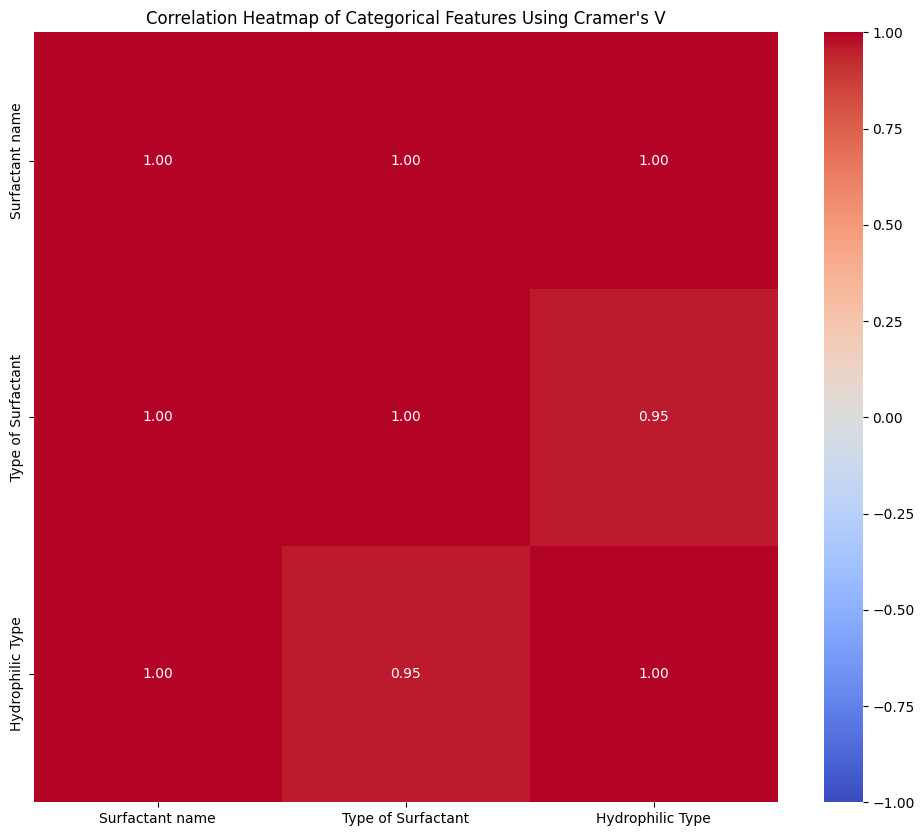

In [23]:
# Checking correlation of categorical features
from scipy import stats

def cramers_v(var1, var2):
    data = pd.crosstab(var1, var2).values
    chi_2 = stats.chi2_contingency(data)[0]
    n = data.sum()
    phi_2 = chi_2 / n
    r, k = data.shape
    return np.sqrt(phi_2 / min((k-1), (r-1)))

crv=[]
for i in range(len(cats_cols)):
  row=[]
  for j in range(len(cats_cols)):
    val = cramers_v(df[cats_cols[i]], df[cats_cols[j]])
    row.append(val)
  crv.append(row)
df_crv = pd.DataFrame(data=crv, columns=cats_cols, index=cats_cols)


plt.figure(figsize=(12, 10))
sns.heatmap(df_crv, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Categorical Features Using Cramer's V")
plt.show()

gg.

# **STAGE 2 : DATA PREPROCESSING**

(mau coba feature engineering tapi gatau konteks jadi gaada)

In [195]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

Surfactant name        Type of Surfactant  EACN Oil  Salinity ppm  \
52         TERRAVIS S9                  Nonionic       6.0      10000.00   
150  ALFOTERRA L145-8S                   Anionic      10.0       2000.00   
4        SOLOTERRA 982                   Anionic      12.0      10000.00   
126                01C  Anionic-Nonionic Mixture      25.2       2512.92   
53      TERRAVIS KK3-8                  Nonionic       6.0      10000.00   

     Salinity mEq/mL  Temp  Conc Surf Hydrophilic Type  \
52            0.1711    50        2.0       Ethoxylate   
150           0.0342    70        2.0          Sulfate   
4             0.1711    50        0.5        Sulfonate   
126           0.0430    63        0.5  Sulfonate-Ester   
53            0.1711    50        2.0       Ethoxylate   

     Hydrophobic Num of Surf  Hydrophilic MW g/mol  Oil Solubilization Ratio  \
52                      13.5                396.00                      4.08   
150                     14.0                 96.06                      0.98   
4                       12.5                 81.00                    128.00   
126                     18.0                157.00                      7.84   
53                      13.0                352.00                      3.00   

     Water Solubilization Ratio   IFT  
52                         3.47  0.20  
150                       50.00  3.38  
4                        200.00  0.10  
126                       54.90  2.71  
53                         1.00  0.30

## Handling Outliers

In [196]:
# # Outlier handling and create outliers-filtered new dataframe

# print(f'Rows before removing outliers: {len(df)}')

# filtered_entries = np.array([True] * len(df))
# # columns_to_handle_outliers = [col for col in df_preprocessed.columns if col in nums_cols and col != "IFT"]
# columns_to_handle_outliers = ['Oil Solubilization Ratio', 'Water Solubilization Ratio']

# for col in columns_to_handle_outliers:
#     Q1 = df_preprocessed[col].quantile(0.25)
#     Q3 = df_preprocessed[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - (IQR * 1.5)
#     upper_bound = Q3 + (IQR * 1.5)

#     filtered_entries = ((df_preprocessed[col] >= lower_bound) & (df_preprocessed[col] <= upper_bound)) & filtered_entries
    
# df_preprocessed = df_preprocessed[filtered_entries]

# print(f'Rows after removing outliers: {len(df_preprocessed)}')

# df_preprocessed

## Feature Encoding

In [197]:
# Re-check the unique values of categorical features to determine encoding technique
encoded_features = cats_cols

for col in encoded_features :
    print(f'======={col}=======')
    print(df_preprocessed[col].unique())
    print()

=======Surfactant name=======
['SOLOTERRA 961' 'SOLOTERRA 925' 'SOLOTERRA 981' 'SOLOTERRA 982'
 'TERRAVIS S9' 'TERRAVIS KK3-6' 'TERRAVIS KK3-8' 'ALFOTERRA 123-13S 90M'
 'ALFOTERRA 123-8S 90M' 'ALFOTERRA S23-7DS 90M' 'ALFOTERRA S23-13S 90M'
 'SOLOTERRA 938' 'A125' 'SOLOTERRA 926' 'SOLOTERRA 927'
 'ALFOTERRA L145-4S 90M' 'SOLOTERRA 970' 'ALFOTERRA L145-8S 90M'
 'ALFOTERRA G16-15S 90M' 'ALFOTERRA G12-15S 90M' 'SOLOTERRA 952'
 'SOLOTERRA 984' 'ALFOTERRA S23-7S 90M' 'SOLOTERRA 962'
 'ALFOTERRA L145-4S' 'ALFOTERRA L145-8S' 'ALFOTERRA G12-15S' 'TERRAVIS S4'
 'TERRAVIS KK3-4' 'Alfoterra 123-13S' 'ALFOTERRA 123-8S'
 'ALFOTERRA S23-7DS' 'Alfoterra 123-13S ' 'SOLOTERRA 921' 'SOLOTERRA 924 '
 '01A' '01B' '01C' 'SAE' 'ALFOTERRA S23-13S' 'TERRAVIS K163'
 'ALFOTERRA S23-7DS ' 'ALFOTERRA 123-13S' 'TERRAVIS S7' 'PDOM' 'FEO'
 'FEO34']

=======Type of Surfactant=======
['Anionic' 'Nonionic' 'Anionic-Nonionic Mixture']

=======Hydrophilic Type=======
['Sulfonate' 'Ethoxylate' 'Sulfate' 'Ethoxycarboxylate'

In [198]:
# One-hot encoding for all categorical features
for col in encoded_features :
    onehots = pd.get_dummies(df_preprocessed[col], prefix=col)
    onehots = onehots.astype(int)
    df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

# Drop the original columns after one-hot encoding
df_preprocessed.drop(encoded_features, axis=1, inplace=True)

In [199]:
# Re-check final dataframe after encoding process
df_preprocessed

EACN Oil  Salinity ppm  Salinity mEq/mL  Temp  Conc Surf  \
0        12.0       10000.0           0.1711    50        1.5   
1        18.0       10000.0           0.1711    50        2.0   
2        18.0       10000.0           0.1711    50        0.5   
3        12.0       10000.0           0.1711    50        1.0   
4        12.0       10000.0           0.1711    50        0.5   
..        ...           ...              ...   ...        ...   
165      10.0        1000.0           0.0171    70        2.0   
166      10.0        1000.0           0.0171    70        2.0   
167      10.0        1000.0           0.0171    70        2.0   
168      10.0        1000.0           0.0171    70        2.0   
169      10.0        1000.0           0.0171    70        2.0   

     Hydrophobic Num of Surf  Hydrophilic MW g/mol  Oil Solubilization Ratio  \
0                       12.5                 81.00                      1.33   
1                       12.5                 81.00                      6.12   
2                       12.5                 81.00                    100.00   
3                       12.5                 81.00                      6.12   
4                       12.5                 81.00                    128.00   
..                       ...                   ...                       ...   
165                     16.0                132.00                     58.33   
166                     14.0                 96.06                     49.04   
167                      7.0                 96.06                      1.92   
168                     12.5                 96.06                      0.98   
169                     12.5                 81.00                     22.12   

     Water Solubilization Ratio     IFT  Surfactant name_01A  \
0                          2.67  0.1000                    0   
1                          1.02  0.2000                    0   
2                          2.00  0.0900                    0   
3                        100.00  0.0050                    0   
4                        200.00  0.1000                    0   
..                          ...     ...                  ...   
165                        4.17  0.0831                    0   
166                        1.92  0.2280                    0   
167                        0.96  0.1700                    0   
168                        0.98  0.0167                    0   
169                        0.96  0.1100                    0   

     Surfactant name_01B  Surfactant name_01C  Surfactant name_A125  \
0                      0                    0                     0   
1                      0                    0                     0   
2                      0                    0                     0   
3                      0                    0                     0   
4                      0                    0                     0   
..                   ...                  ...                   ...   
165                    0                    0                     0   
166                    0                    0                     0   
167                    0                    0                     0   
168                    0                    0                     0   
169                    0                    0                     0   

     Surfactant name_ALFOTERRA 123-13S  Surfactant name_ALFOTERRA 123-13S 90M  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   
..                                 ...                                    ...   
165                                  0                                    

## Feature Selection

In [200]:
# Re-arrange the columns (Clicked on Ad in last)
df_1 = df_preprocessed.drop(columns='IFT')
df_2 = df_preprocessed['IFT']
df_preprocessed = pd.concat([df_1, df_2], axis='columns')

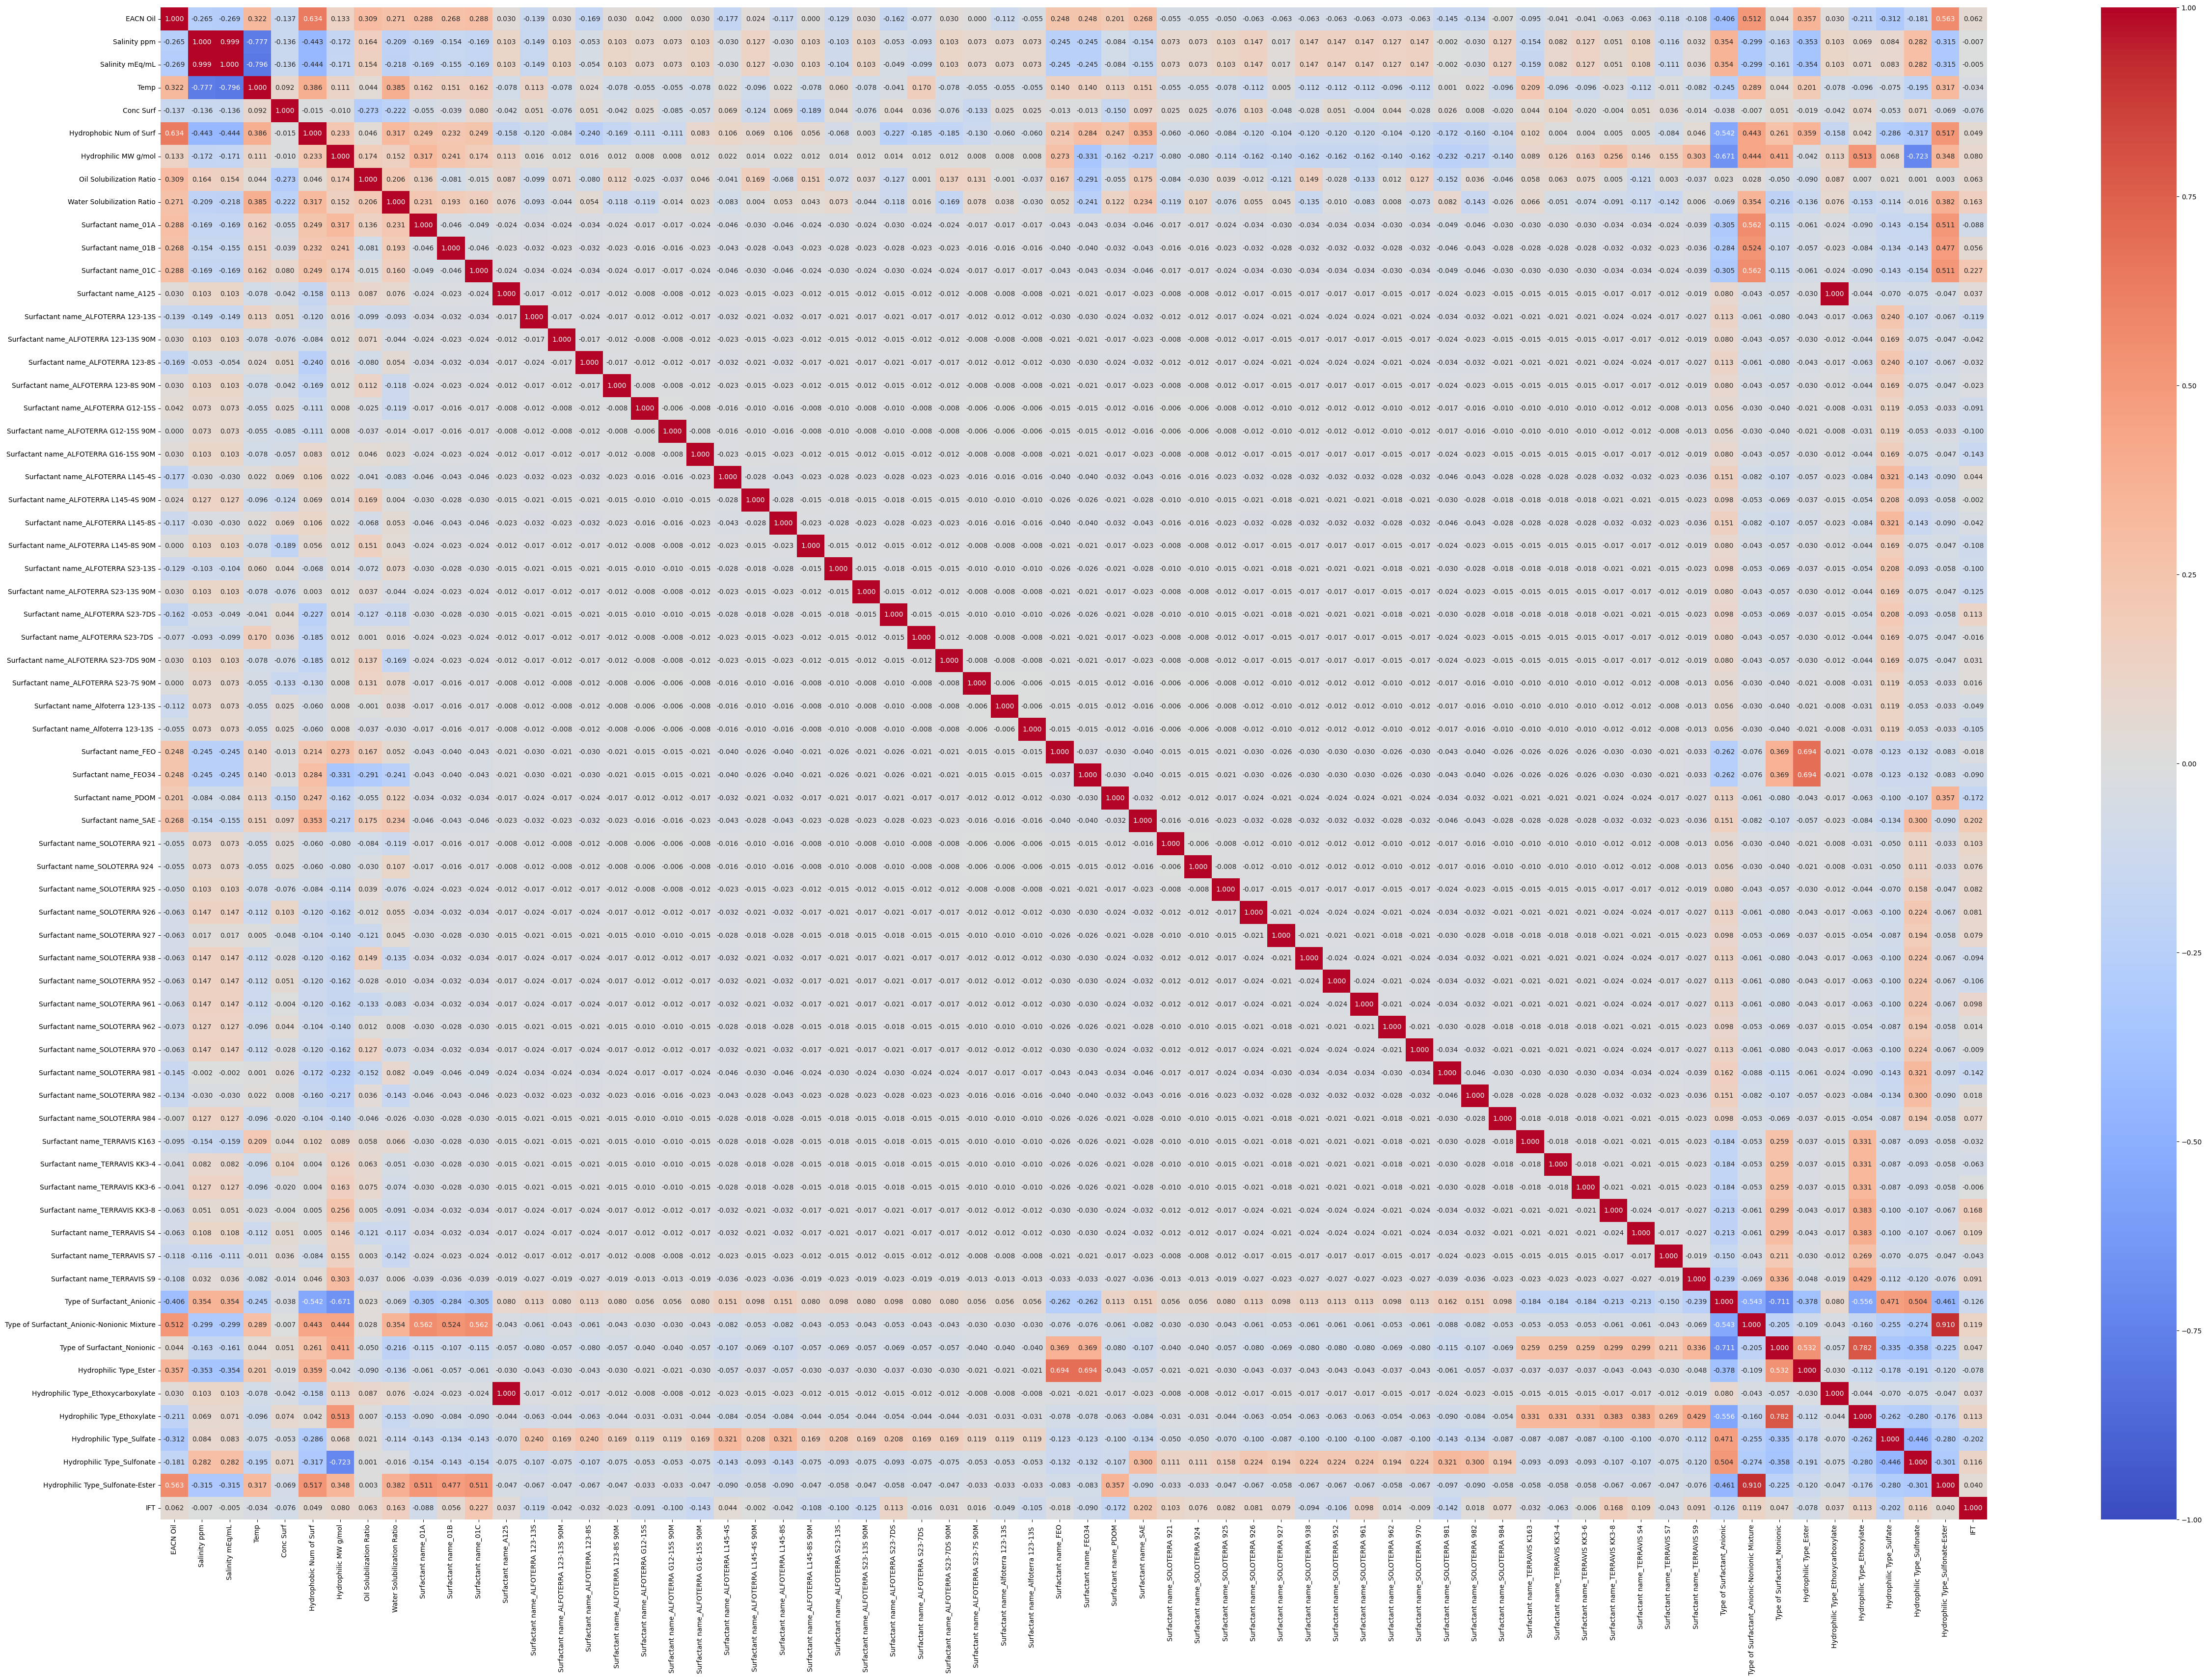

In [201]:
# Heatmap (Spearman corr)
plt.figure(figsize=(60, 40))
sns.heatmap(data = df_preprocessed.corr(method='spearman', numeric_only=True), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [202]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df_preprocessed.corr(method='spearman', numeric_only=True)

# Flatten the correlation matrix
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'IFT') & (flat_cm['B'] != 'IFT')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundant_cm = flat_cm[flat_cm['Corr Value'] >= 0.5]
redundant_cm = redundant_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)

pd.set_option('display.max_rows', None)
display(redundant_cm)
pd.reset_option('display.max_rows')

A  \
0                                  Salinity ppm   
1              Hydrophilic Type_Sulfonate-Ester   
2                                          Temp   
3                   Hydrophilic Type_Ethoxylate   
4                                          Temp   
5                          Hydrophilic MW g/mol   
6                   Type of Surfactant_Nonionic   
7                        Hydrophilic Type_Ester   
8                    Type of Surfactant_Anionic   
9                                      EACN Oil   
10                                     EACN Oil   
11                          Surfactant name_01A   
12                   Type of Surfactant_Anionic   
13  Type of Surfactant_Anionic-Nonionic Mixture   
14                   Type of Surfactant_Anionic   
15                  Type of Surfactant_Nonionic   
16                          Surfactant name_01B   
17             Hydrophilic Type_Sulfonate-Ester   
18                         Hydrophilic MW g/mol   
19  Type of Surfactant_Anionic-Nonionic Mixture   
20             Hydrophilic Type_Sulfonate-Ester   
21                   Type of Surfactant_Anionic   

                                              B  Corr Value Corr Type  
0                               Salinity mEq/mL    0.999406  Positive  
1   Type of Surfactant_Anionic-Nonionic Mixture    0.910314  Positive  
2                               Salinity mEq/mL    0.796364  Negative  
3                   Type of Surfactant_Nonionic    0.782223  Positive  
4                                  Salinity ppm    0.776752  Negative  
5                    Hydrophilic Type_Sulfonate    0.722773  Negative  
6                    Type of Surfactant_Anionic    0.710942  Negative  
7                           Surfactant name_FEO    0.694051  Positive  
8                          Hydrophilic MW g/mol    0.671169  Negative  
9                       Hydrophobic Num of Surf    0.633843  Positive  
10             Hydrophilic Type_Sulfonate-Ester    0.562502  Positive  
11  Type of Surfactant_Anionic-Nonionic Mixture    0.561801  Positive  
12                  Hydrophilic Type_Ethoxylate    0.556115  Negative  
13                   Type of Surfactant_Anionic    0.542551  Negative  
14                      Hydrophobic Num of Surf    0.542086  Negative  
15                       Hydrophilic Type_Ester    0.531696  Positive  
16  Type of Surfactant_Anionic-Nonionic Mixture    0.523902  Positive  
17                      Hydrophobic Num of Surf    0.516747  Positive  
18                  Hydrophilic Type_Ethoxylate    0.512910  Positive  
19                                     EACN Oil    0.512054  Positive  
20                          Surfactant name_01A    0.511415  Positive  
21                   Hydrophilic Type_Sulfonate    0.504193  Positive

In [203]:
# Feature-Target correlation representation in tabular form 
corr_target = df_preprocessed.corrwith(df_preprocessed['IFT'], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "IFT"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr = corr.iloc[:20, :]
corr

Feature  Corr Value Corr Type
0                           Surfactant name_01C    0.227044  Positive
1                      Hydrophilic Type_Sulfate    0.202489  Negative
2                           Surfactant name_SAE    0.202450  Positive
3                          Surfactant name_PDOM    0.171650  Negative
4                Surfactant name_TERRAVIS KK3-8    0.167695  Positive
5                    Water Solubilization Ratio    0.162793  Positive
6         Surfactant name_ALFOTERRA G16-15S 90M    0.143446  Negative
7                 Surfactant name_SOLOTERRA 981    0.141549  Negative
8                    Type of Surfactant_Anionic    0.126062  Negative
9         Surfactant name_ALFOTERRA S23-13S 90M    0.125098  Negative
10  Type of Surfactant_Anionic-Nonionic Mixture    0.119010  Positive
11            Surfactant name_ALFOTERRA 123-13S    0.118652  Negative
12                   Hydrophilic Type_Sulfonate    0.115973  Positive
13            Surfactant name_ALFOTERRA S23-7DS    0.112920  Positive
14                  Hydrophilic Type_Ethoxylate    0.112599  Positive
15                  Surfactant name_TERRAVIS S4    0.108764  Positive
16        Surfactant name_ALFOTERRA L145-8S 90M    0.107862  Negative
17                Surfactant name_SOLOTERRA 952    0.105996  Negative
18           Surfactant name_Alfoterra 123-13S     0.105051  Negative
19                Surfactant name_SOLOTERRA 921    0.102699  Positive

### SelectKBest Feature Importance (Statistical Test)

In [204]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_preprocessed.copy()
df_feature_target_relation.head()

EACN Oil  Salinity ppm  Salinity mEq/mL  Temp  Conc Surf  \
0      12.0       10000.0           0.1711    50        1.5   
1      18.0       10000.0           0.1711    50        2.0   
2      18.0       10000.0           0.1711    50        0.5   
3      12.0       10000.0           0.1711    50        1.0   
4      12.0       10000.0           0.1711    50        0.5   

   Hydrophobic Num of Surf  Hydrophilic MW g/mol  Oil Solubilization Ratio  \
0                     12.5                  81.0                      1.33   
1                     12.5                  81.0                      6.12   
2                     12.5                  81.0                    100.00   
3                     12.5                  81.0                      6.12   
4                     12.5                  81.0                    128.00   

   Water Solubilization Ratio  Surfactant name_01A  Surfactant name_01B  \
0                        2.67                    0                    0   
1                        1.02                    0                    0   
2                        2.00                    0                    0   
3                      100.00                    0                    0   
4                      200.00                    0                    0   

   Surfactant name_01C  Surfactant name_A125  \
0                    0                     0   
1                    0                     0   
2                    0                     0   
3                    0                     0   
4                    0                     0   

   Surfactant name_ALFOTERRA 123-13S  Surfactant name_ALFOTERRA 123-13S 90M  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   

   Surfactant name_ALFOTERRA 123-8S  Surfactant name_ALFOTERRA 123-8S 90M  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   

   Surfactant name_ALFOTERRA G12-15S  Surfactant name_ALFOTERRA G12-15S 90M  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   

   Surfactant name_ALFOTERRA G16-15S 90M  Surfactant name_ALFOTERRA L145-4S  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   Surfactant name_ALFOTERRA L145-4S 90M  Surfactant name_ALFOTERRA L145-8S  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   Surfactant name_ALFOTERRA L145-8S 90M  Surfactant

In [205]:
# Calculation of feature importance score to target (numerical/categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['IFT'])  # Features
y_target_test = df_feature_target_relation['IFT']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_regression, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
pd.set_option('display.max_rows', None)  # Set max_rows to None for unlimited rows
display(feature_scores_df)

pd.reset_option('display.max_rows')

Feature     Score P_Values
3                                          Temp  0.257468     None
2                               Salinity mEq/mL  0.212288     None
1                                  Salinity ppm  0.196910     None
64             Hydrophilic Type_Sulfonate-Ester  0.129244     None
0                                      EACN Oil  0.127554     None
6                          Hydrophilic MW g/mol  0.107259     None
5                       Hydrophobic Num of Surf  0.105986     None
57  Type of Surfactant_Anionic-Nonionic Mixture  0.082727     None
9                           Surfactant name_01A  0.071204     None
62                     Hydrophilic Type_Sulfate  0.058118     None
7                      Oil Solubilization Ratio  0.055610     None
46                Surfactant name_SOLOTERRA 981  0.053703     None
33                        Surfactant name_FEO34  0.042336     None
45                Surfactant name_SOLOTERRA 970  0.040303     None
11                          Surfactant name_01C  0.037713     None
42                Surfactant name_SOLOTERRA 952  0.037156     None
32                          Surfactant name_FEO  0.035551     None
40                Surfactant name_SOLOTERRA 927  0.029379     None
54                  Surfactant name_TERRAVIS S7  0.022936     None
19        Surfactant name_ALFOTERRA G16-15S 90M  0.021209     None
29         Surfactant name_ALFOTERRA S23-7S 90M  0.019285     None
39                Surfactant name_SOLOTERRA 926  0.019273     None
25        Surfactant name_ALFOTERRA S23-13S 90M  0.018740     None
10                          Surfactant name_01B  0.017015     None
23        Surfactant name_ALFOTERRA L145-8S 90M  0.013242     None
55                  Surfactant name_TERRAVIS S9  0.011725     None
34                         Surfactant name_PDOM  0.011197     None
31           Surfactant name_Alfoterra 123-13S   0.006188     None
53                  Surfactant name_TERRAVIS S4  0.006153     None
18        Surfactant name_ALFOTERRA G12-15S 90M  0.004545     None
24            Surfactant name_ALFOTERRA S23-13S  0.004023     None
51               Surfactant name_TERRAVIS KK3-6  0.003009     None
61                  Hydrophilic Type_Ethoxylate  0.002509     None
60           Hydrophilic Type_Ethoxycarboxylate  0.001157     None
37               Surfactant name_SOLOTERRA 924   0.001009     None
52               Surfactant name_TERRAVIS KK3-8  0.000000     None
50               Surfactant name_TERRAVIS KK3-4  0.000000     None
49                Surfactant name_TERRAVIS K163  0.000000     None
17            Surfactant name_ALFOTERRA G12-15S  0.000000     None
56                   Type of Surfactant_Anionic  0.000000     None
47                Surfactant name_SOLOTERRA 982  0.000000     None
58                  Type of Surfactant_Nonionic  0.000000     None
59                       Hydrophilic Type_Ester  0.000000     None
8                    Water Solubilization Ratio  0.000000     None
63                   Hydrophilic Type_Sulfonate  0.000000     None
48                Surfactant name_SOLOTERRA 984  0.000000     None
41                Surfactant name_SOLOTERRA 938  0.000000     None
12                         Surfactant name_A125  0.000000     None
13            Surfactant name_ALFOTERRA 123-13S  0.000000     None
20            Surfactant name_ALFOTERRA L145-4S  0.000000     None
21        Surfactant name_ALFOTERRA L145-4S 90M  0.000000     None
22            Surfactant name_ALFOTERRA L145-8S  0.000000     None
26            Surfactant name_ALFOTERRA S23-7DS  0.000000     None
27           Surfactant name_ALFOTERRA S23-7DS   0.000000     None
28        Surfactant name_ALFOTERRA S23-7DS 90M  0.000000     None
30            Surfactant name_Alfoterra 123-13S  0.000000     None
4                                     Conc Surf  0.000000     None
16         Surfactant name_ALFOTERRA 123-8S 90M  0.000000     None
15             Surfactant name_ALFOTERRA 123-8S  0.000000     None
36                Su

Initially we will be using all features.

In [206]:
df_preprocessed.columns

Index(['EACN Oil', 'Salinity ppm', 'Salinity mEq/mL', 'Temp', 'Conc Surf',
       'Hydrophobic Num of Surf', 'Hydrophilic MW g/mol',
       'Oil Solubilization Ratio', 'Water Solubilization Ratio',
       'Surfactant name_01A', 'Surfactant name_01B', 'Surfactant name_01C',
       'Surfactant name_A125', 'Surfactant name_ALFOTERRA 123-13S',
       'Surfactant name_ALFOTERRA 123-13S 90M',
       'Surfactant name_ALFOTERRA 123-8S',
       'Surfactant name_ALFOTERRA 123-8S 90M',
       'Surfactant name_ALFOTERRA G12-15S',
       'Surfactant name_ALFOTERRA G12-15S 90M',
       'Surfactant name_ALFOTERRA G16-15S 90M',
       'Surfactant name_ALFOTERRA L145-4S',
       'Surfactant name_ALFOTERRA L145-4S 90M',
       'Surfactant name_ALFOTERRA L145-8S',
       'Surfactant name_ALFOTERRA L145-8S 90M',
       'Surfactant name_ALFOTERRA S23-13S',
       'Surfactant name_ALFOTERRA S23-13S 90M',
       'Surfactant name_ALFOTERRA S23-7DS',
       'Surfactant name_ALFOTERRA S23-7DS ',
       'Surfact

In [207]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_preprocessed.copy()

# Important features only based on correlation and K-best parameter (correlation > 0.7 will be dropped)
selected_features = df_preprocessed.columns
# selected_features = [col for col in df_preprocessed.columns if col != "Surfactant name"]

df_model = df_model[selected_features]

## Split Train and Test Data

In [208]:
# Split Train and Test Data
X = df_model.drop(columns=['IFT'])
y = df_model['IFT']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check dimension of train and test data
print(f'Dimension of x_train data : {X_train.shape}')
print(f'Dimension of y_train data : {y_train.shape}')
print(f'Dimension of x_test data : {X_test.shape}')
print(f'Dimension of y_test data : {y_test.shape}')

Dimension of x_train data : (136, 65)
Dimension of y_train data : (136,)
Dimension of x_test data : (34, 65)
Dimension of y_test data : (34,)


## Feature Scalling

Initially for the scalling we will be using normalization and then standardization.

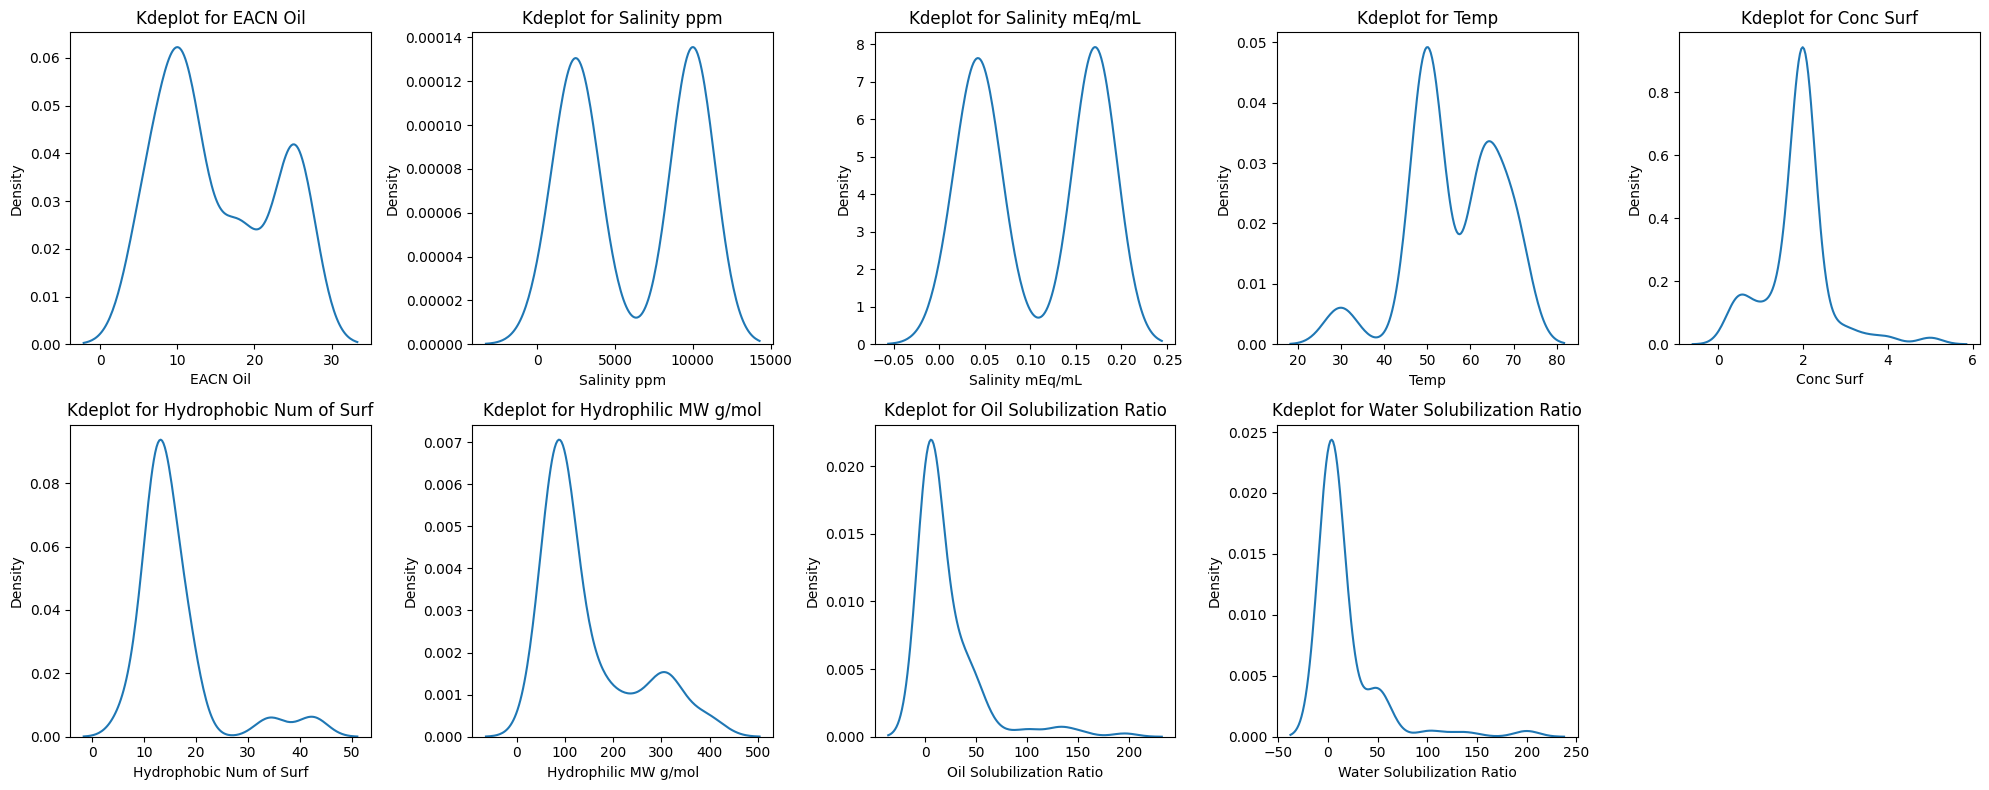

In [209]:
# Checking distribution before scaling
fig, ax  = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
ax = ax.flatten()

columns_to_scale = [col for col in df_preprocessed.columns if col in nums_cols and col != "IFT"] # Choose columns for scaling based on the distribution in EDA

for i, col in enumerate(columns_to_scale) :
    sns.kdeplot(data=X_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

# Remove the tenth subplot
# del ax[9]
ax[9].axis('off')

plt.tight_layout()
plt.show()

In [210]:
# Scaling with normalization continued by standardization method
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer

ms = MinMaxScaler()
ss = StandardScaler()
# ptf = PowerTransformer()

# Apply log transformation
log_transform_columns = ['Hydrophobic Num of Surf', 'Hydrophilic MW g/mol', 'Oil Solubilization Ratio', 'Water Solubilization Ratio']
for col in log_transform_columns:
    # if X[col].skew() > 1:  # Apply log transformation if skewness is greater than 1 (sudah dipilih duluan diatas)
        X_train[col] = np.log1p(X_train[col])  # np.log1p is used to handle zero values (log1p(x) = log(1 + x))

# # Apply power transformation
# X_train[columns_to_scale] = ptf.fit_transform(X_train[columns_to_scale])
# X_test[columns_to_scale] = ptf.transform(X_test[columns_to_scale])

# # Check for NaN values
# print("Number of NaN values in training set:", X_train.isna().sum().sum())
# print("Number of NaN values in test set:", X_test.isna().sum().sum())

# # Impute NaN values using mean strategy
# imputer = SimpleImputer(strategy='mean')
# X_train[columns_to_scale] = imputer.fit_transform(X_train[columns_to_scale])
# X_test[columns_to_scale] = imputer.transform(X_test[columns_to_scale])

# Apply min-max scaling
X_train[columns_to_scale] = ms.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = ms.transform(X_test[columns_to_scale])

# Apply standardization
X_train[columns_to_scale] = ss.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = ss.transform(X_test[columns_to_scale])

In [211]:
# Statistical summary of mean and standard deviation after scale
X_train[columns_to_scale].describe().transpose()[['mean', 'std']]

mean       std
EACN Oil                    7.836868e-17  1.003697
Salinity ppm                9.143013e-17  1.003697
Salinity mEq/mL             1.567374e-16  1.003697
Temp                        1.404106e-16  1.003697
Conc Surf                   3.918434e-17  1.003697
Hydrophobic Num of Surf    -1.959217e-17  1.003697
Hydrophilic MW g/mol        1.175530e-16  1.003697
Oil Solubilization Ratio   -7.836868e-17  1.003697
Water Solubilization Ratio -1.567374e-16  1.003697

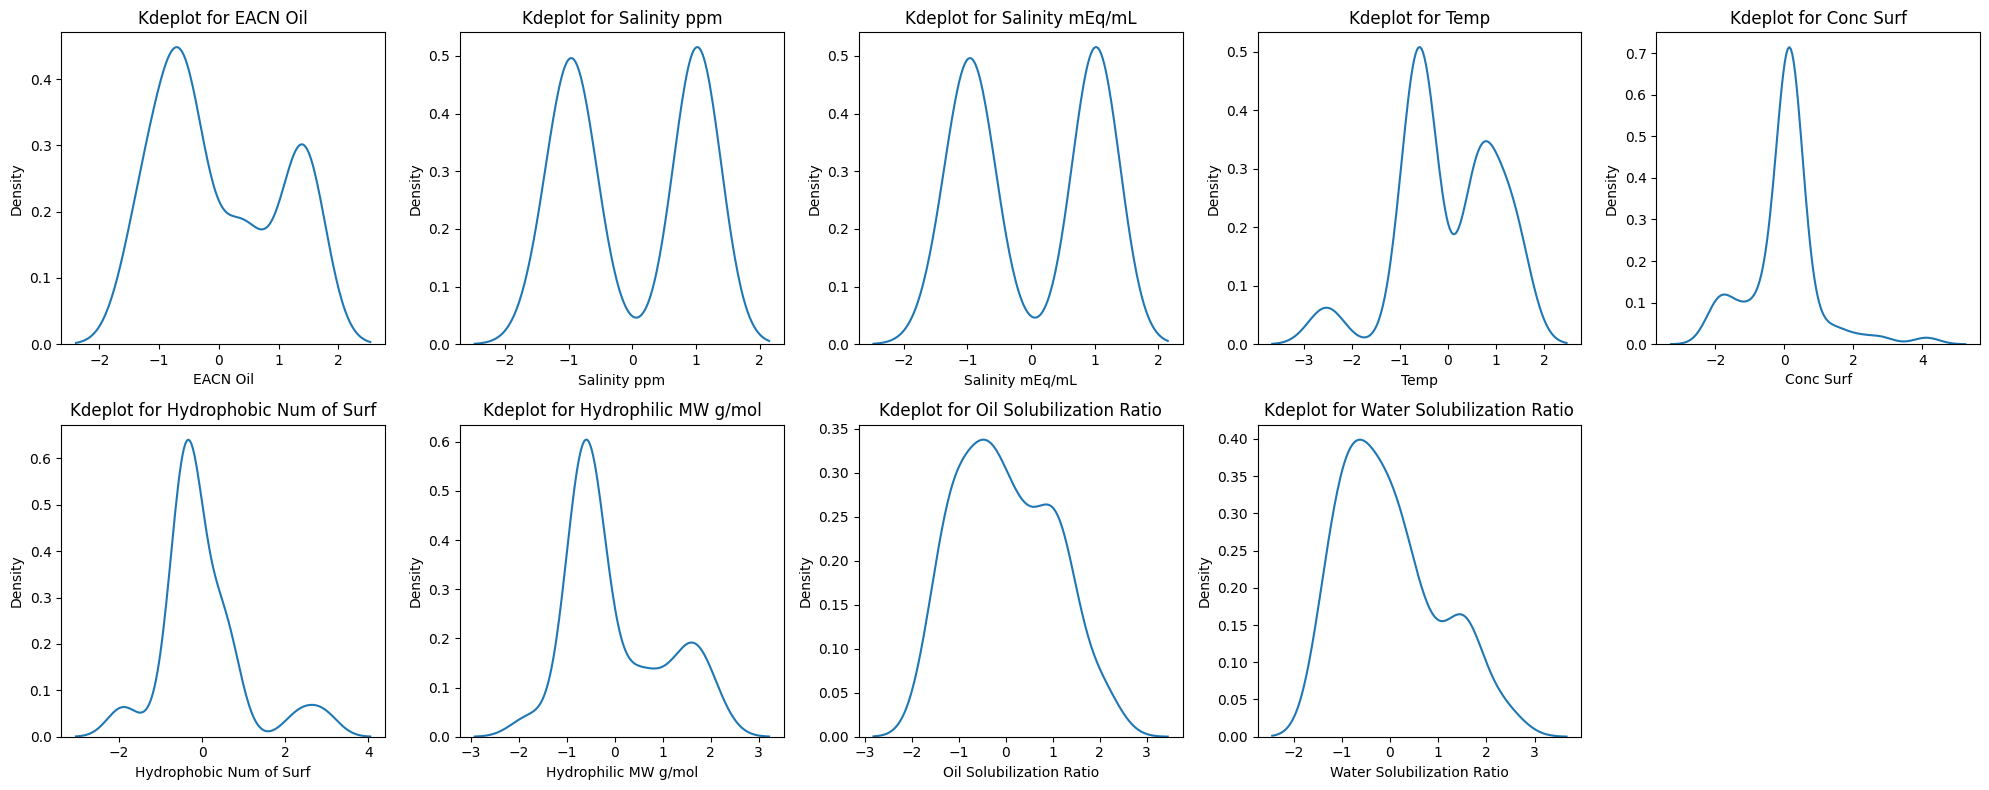

In [212]:
# Checking distribution after scaling
fig, ax  = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
ax = ax.flatten()

columns_to_scale = [col for col in df_preprocessed.columns if col in nums_cols and col != "IFT"] # Choose columns for scaling based on the distribution in EDA

for i, col in enumerate(columns_to_scale) :
    sns.kdeplot(data=X_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

# Remove the tenth subplot
# del ax[9]
ax[9].axis('off')

plt.tight_layout()
plt.show()

**Reminder About Choosing Scaling Methods**

If the issue is primarily with the range of values rather than the shape of the distributions, you can use scaling methods to bring all features to a similar scale without altering their distributions. Here are some common scaling methods you can consider:

1. **Min-Max Scaling (Normalization)**:
   - Scales the data to a fixed range, usually between 0 and 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - Use when you know the minimum and maximum values for your features or when you want to bound the data within a specific range.

2. **Standard Scaling (Standardization)**:
   - Scales the data so that it has a mean of 0 and a standard deviation of 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - \mu}{\sigma} \)
   - Use when the features are normally distributed or when you're using models that assume zero-centered data.

3. **Robust Scaling**:
   - Scales the data similarly to standard scaling but uses the median and the interquartile range (IQR) instead of the mean and standard deviation.
   - Formula: \( X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} \)
   - Use when the data contains outliers or when the distribution is not normal.

4. **Max Abs Scaler**:
   - Scales each feature to its maximum absolute value.
   - Formula: \( X_{\text{scaled}} = \frac{X}{\max(|X|)} \)
   - Use when the features are sparse or when you want to preserve sparsity.

5. **Power Transformer (Yeo-Johnson or Box-Cox)**:
   - Applies a power transformation to make the data more Gaussian-like.
   - Use when the data is skewed or when you need to stabilize variance.

For your case where the overall feature distributions are near normal but the ranges vary significantly, Min-Max Scaling or Standard Scaling might be appropriate. If you're concerned about outliers, Robust Scaling could be a better choice. It's often a good idea to try different scaling methods and see which one works best for your specific dataset and model.

# **STAGE 3 : MODELLING AND EVALUATION**

### Helper Function

First we will define some functions that will help us in the process of training and evaluation.

In [213]:
# Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

# Evaluation score calculation
def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Print evaluation scores
    print(f"MAE Score (Test Set): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MAE Score (Train Set): {mean_absolute_error(y_train, y_pred_train):.2f}")

    print(f"RMSE Score (Test Set): {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"RMSE Score (Train Set): {mean_squared_error(y_train, y_pred_train, squared=False):.2f}")

    print(f"MAPE Score (Test Set): {mean_absolute_percentage_error(y_test, y_pred):.2f}")
    print(f"MAPE Score (Train Set): {mean_absolute_percentage_error(y_train, y_pred_train):.2f}")

    print(f"R2 Score (Test Set): {r2_score(y_test, y_pred):.2f}")
    print(f"R2 Score (Train Set): {r2_score(y_train, y_pred_train):.2f}")

    # Cross Validation
    cv = RepeatedKFold(n_splits=7, n_repeats=7, random_state=42)
    score = cross_validate(model, X_train, y_train, cv=cv, scoring='r2', return_train_score=True) # Scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print(f"R2 Score (Crossval Test): {score['test_score'].mean():.2f}") 
    print(f"R2 Score (Crossval Train): {score['train_score'].mean():.2f}")

def grid_pipe(pipedict, hyperdict, scoring='r2', display=True):
    fitted_models = {}
    fit_time = []
    for name, pipeline in pipedict.items():

    # Construct grid search
        cv = RepeatedKFold(n_splits=7, n_repeats=7, random_state=42)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        fit_time.append(round(end-start, 2))

        # Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best R2 Score: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models, fit_time

### Train Vanilla Models

In [214]:
# Import models
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


# Initiatialize object for each model
svr = SVR()
gpr = GaussianProcessRegressor(random_state=42)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
mlp = MLPRegressor(random_state=42)


models = [svr, gpr, knn, dt, rf, gb, xgb, mlp]

# Train models
for model in models :
    model.fit(X_train, y_train)

### Evaluate Vanilla Models

#### SVM

In [215]:
eval_regression(svr)

MAE Score (Test Set): 0.59
MAE Score (Train Set): 0.20
RMSE Score (Test Set): 0.95
RMSE Score (Train Set): 0.49
MAPE Score (Test Set): 19.75
MAPE Score (Train Set): 7.27
R2 Score (Test Set): -0.00
R2 Score (Train Set): 0.56
R2 Score (Crossval Test): 0.29
R2 Score (Crossval Train): 0.56


#### GPR

In [216]:
eval_regression(gpr)

MAE Score (Test Set): 0.47
MAE Score (Train Set): 0.00
RMSE Score (Test Set): 1.05
RMSE Score (Train Set): 0.00
MAPE Score (Test Set): 1.00
MAPE Score (Train Set): 0.00
R2 Score (Test Set): -0.24
R2 Score (Train Set): 1.00
R2 Score (Crossval Test): 0.07
R2 Score (Crossval Train): 1.00


#### K-Nearest Neighbours

In [217]:
eval_regression(knn)

MAE Score (Test Set): 0.46
MAE Score (Train Set): 0.26
RMSE Score (Test Set): 0.78
RMSE Score (Train Set): 0.50
MAPE Score (Test Set): 15.94
MAPE Score (Train Set): 18.58
R2 Score (Test Set): 0.32
R2 Score (Train Set): 0.53
R2 Score (Crossval Test): -0.17
R2 Score (Crossval Train): 0.50


#### Decision Tree

In [218]:
eval_regression(dt)

MAE Score (Test Set): 0.60
MAE Score (Train Set): 0.00
RMSE Score (Test Set): 1.08
RMSE Score (Train Set): 0.00
MAPE Score (Test Set): 25.34
MAPE Score (Train Set): 0.00
R2 Score (Test Set): -0.31
R2 Score (Train Set): 1.00
R2 Score (Crossval Test): -1.08
R2 Score (Crossval Train): 1.00


#### Random Forest

In [219]:
eval_regression(rf)

MAE Score (Test Set): 1.06
MAE Score (Train Set): 0.11
RMSE Score (Test Set): 1.23
RMSE Score (Train Set): 0.23
MAPE Score (Test Set): 64.59
MAPE Score (Train Set): 3.99
R2 Score (Test Set): -0.69
R2 Score (Train Set): 0.90
R2 Score (Crossval Test): 0.01
R2 Score (Crossval Train): 0.90


#### GradientBoost

In [220]:
eval_regression(gb)

MAE Score (Test Set): 0.73
MAE Score (Train Set): 0.08
RMSE Score (Test Set): 0.99
RMSE Score (Train Set): 0.11
MAPE Score (Test Set): 56.88
MAPE Score (Train Set): 5.11
R2 Score (Test Set): -0.09
R2 Score (Train Set): 0.98
R2 Score (Crossval Test): -0.40
R2 Score (Crossval Train): 0.98


#### XGBoost

In [221]:
eval_regression(xgb)

MAE Score (Test Set): 0.99
MAE Score (Train Set): 0.00
RMSE Score (Test Set): 1.25
RMSE Score (Train Set): 0.00
MAPE Score (Test Set): 54.53
MAPE Score (Train Set): 0.17
R2 Score (Test Set): -0.75
R2 Score (Train Set): 1.00
R2 Score (Crossval Test): -0.79
R2 Score (Crossval Train): 1.00


#### Multi Layer Perceptron (MLP)

In [222]:
eval_regression(mlp)

MAE Score (Test Set): 10.37
MAE Score (Train Set): 0.10
RMSE Score (Test Set): 13.93
RMSE Score (Train Set): 0.23
MAPE Score (Test Set): 422.39
MAPE Score (Train Set): 13.92
R2 Score (Test Set): -216.37
R2 Score (Train Set): 0.90
R2 Score (Crossval Test): -0.41
R2 Score (Crossval Train): 0.92


### Hyperparameter Tuning

In [223]:
?Pipeline

Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
A sequence of data transformers with an optional final predictor.

`Pipeline` allows you to sequentially apply a list of transformers to
preprocess the data and, if desired, conclude the sequence with a final
:term:`predictor` for predictive modeling.

Intermediate steps of the pipeline must be 'transforms', that is, they
must implement `fit` and `transform` methods.
The final :term:`estimator` only needs to implement `fit`.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. A step's
estimator may be replaced entirely by setting the parameter with its name
to another estimator, or a transformer removed by sett

In [229]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Create pipeline for each of the classifiers.
pipelines = {'svr' : Pipeline([('rg', SVR())]),
             'gpr' : Pipeline([('rg', GaussianProcessRegressor(random_state=42))]),
             'knn': Pipeline([('rg', KNeighborsRegressor())]),
             'decisiontree': Pipeline([('rg', DecisionTreeRegressor(random_state = 42))]),
             'randomforest': Pipeline([('rg', RandomForestRegressor(random_state = 42))]),
             'gb': Pipeline([('rg', GradientBoostingRegressor(random_state = 42))]),
             'xgboost': Pipeline([('rg', XGBRegressor(random_state=42))]),
             'mlp' : Pipeline([('rg', MLPRegressor(random_state=42))])}

# Define Hyperparameters for each pipeline
hyperparameters_svr = {'rg__kernel': ['rbf', 'poly'],
                       'rg__C': [0.1, 1, 10],
                       'rg__gamma': [0.01, 0.1, 1],
                       'rg__epsilon': [0.01, 0.1, 1]}

hyperparameters_gpr = {'rg__kernel': [C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))],
                       'rg__alpha': [1e-10, 1e-5, 0.1, 1.0],
                       'rg__optimizer': ['fmin_l_bfgs_b', None],
                       'rg__n_restarts_optimizer': [0, 1, 5]}

hyperparameters_knn ={'rg__n_neighbors' : [int(x) for x in np.arange(1, 30)],
                      'rg__weights' : ['uniform', 'distance'],
                      'rg__p' : [1, 2],
                      'rg__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_dt ={'rg__criterion' : ['squared_error', 'absolute_error'],
                     'rg__max_depth' : [int(x) for x in np.linspace(1, 10, num = 5)],
                     'rg__min_samples_split' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__min_samples_leaf' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__max_features' : ['sqrt'],
                     'rg__splitter' : ['best']}

hyperparameters_rf ={'rg__n_estimators': [int(x) for x in np.linspace(50, 120, 5)],
                     'rg__criterion': ['squared_error', 'absolute_error'],
                     'rg__max_depth' : [int(x) for x in np.linspace(1, 10, num = 5)],
                     'rg__max_features':['sqrt'],
                     'rg__min_samples_leaf' : [int(x) for x in np.linspace(2, 10, num = 5)]}

hyperparameters_gb ={'rg__n_estimators': [int(x) for x in np.linspace(50, 120, 5)],
                     'rg__criterion' : ['squared_error', 'friedman_mse'],
                     'rg__max_depth' : [int(x) for x in np.linspace(1, 10, num = 5)],
                     'rg__min_samples_split' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__min_samples_leaf' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__max_features' : ['sqrt'],
                     'rg__loss' : ['squared_error', 'absolute_error']}

hyperparameters_xgb ={'rg__eta': [float(x) for x in np.linspace(0.1, 0.9, 10)],
                      'rg__gamma' : [float(x) for x in np.linspace(0, 3, num = 5)],
                      'rg__max_depth': [int(x) for x in np.linspace(1, 10, num = 5)],
                      'rg__nthread' : [2, 4, 6, 8],
                      'rg__tree_method' : ['approx', 'hist']}

hyperparameters_mlp ={'rg__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                     'rg__activation': ['tanh', 'relu'],
                     'rg__solver': ['sgd', 'adam'],
                     'rg__alpha': [0.0001, 0.05],
                     'rg__learning_rate': ['constant','adaptive'],
                     'rg__learning_rate_init': [0.001, 0.01, 0.1],
                     'rg__max_iter': [500, 1000, 1500]}

# Instantiate hyperparapeter dictionary
hyperparameters = {'svr' : hyperparameters_svr,
                   'gpr' : hyperparameters_gpr,
                   'knn':hyperparameters_knn,
                   'decisiontree':hyperparameters_dt,
                   'randomforest':hyperparameters_rf,
                   'gb':hyperparameters_gb,
                   'xgboost': hyperparameters_xgb,
                   'mlp' : hyperparameters_mlp}

In [230]:
fitted_models, fit_time = grid_pipe(pipelines, hyperparameters, scoring='r2')

Fitting 49 folds for each of 54 candidates, totalling 2646 fits
The svr model has been fitted.
Total Fit Time: 11.220s
Best R2 Score: 0.319
Best params:
 {'rg__C': 1, 'rg__epsilon': 0.01, 'rg__gamma': 0.1, 'rg__kernel': 'rbf'} 

Fitting 49 folds for each of 24 candidates, totalling 1176 fits
The gpr model has been fitted.
Total Fit Time: 8.048s
Best R2 Score: 0.195
Best params:
 {'rg__alpha': 0.1, 'rg__kernel': 1**2 * RBF(length_scale=1), 'rg__n_restarts_optimizer': 0, 'rg__optimizer': None} 

Fitting 49 folds for each of 464 candidates, totalling 22736 fits
The knn model has been fitted.
Total Fit Time: 20.884s
Best R2 Score: 0.043
Best params:
 {'rg__algorithm': 'ball_tree', 'rg__n_neighbors': 25, 'rg__p': 1, 'rg__weights': 'distance'} 

Fitting 49 folds for each of 250 candidates, totalling 12250 fits
The decisiontree model has been fitted.
Total Fit Time: 10.116s
Best R2 Score: 0.011
Best params:
 {'rg__criterion': 'absolute_error', 'rg__max_depth': 3, 'rg__max_features': 'sqrt', '

### Train Tuned Models

In [231]:
# Import models
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Initiatialize object for each model
svr_tuned = SVR(C=1, epsilon=0.01, gamma=0.1, kernel='rbf')
gpr_tuned = GaussianProcessRegressor(alpha=0.1, kernel=1**2 * RBF(length_scale=1), n_restarts_optimizer=0, optimizer=None, random_state=42)
knn_tuned = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=25, p=1, weights='distance')
dt_tuned = DecisionTreeRegressor(criterion='absolute_error', max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, splitter='best', random_state=42)
rf_tuned = RandomForestRegressor(n_estimators=85, criterion='absolute_error', max_depth=7, max_features='sqrt', min_samples_leaf=2, random_state=42)
gb_tuned = GradientBoostingRegressor(n_estimators=85, criterion='friedman_mse', loss='absolute_error', max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42)
xgb_tuned = XGBRegressor(eta=0.3666666666666667, gamma=2.25, max_depth=3, nthread=2, tree_method='approx', random_state=42)
mlp_tuned = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='adaptive', learning_rate_init=0.001, max_iter=1000, solver='sgd', random_state=42)

models = [svr_tuned, gpr_tuned, knn_tuned, dt_tuned, rf_tuned, gb_tuned, xgb_tuned, mlp_tuned]

# Train models
for model in models :
    model.fit(X_train, y_train)

### Evaluate Tuned Models

#### SVM

In [232]:
eval_regression(svr_tuned)

MAE Score (Test Set): 0.55
MAE Score (Train Set): 0.14
RMSE Score (Test Set): 0.95
RMSE Score (Train Set): 0.48
MAPE Score (Test Set): 16.78
MAPE Score (Train Set): 2.19
R2 Score (Test Set): -0.01
R2 Score (Train Set): 0.58
R2 Score (Crossval Test): 0.32
R2 Score (Crossval Train): 0.58


#### GPR

In [233]:
eval_regression(gpr_tuned)

MAE Score (Test Set): 0.47
MAE Score (Train Set): 0.04
RMSE Score (Test Set): 1.05
RMSE Score (Train Set): 0.10
MAPE Score (Test Set): 1.00
MAPE Score (Train Set): 6.58
R2 Score (Test Set): -0.24
R2 Score (Train Set): 0.98
R2 Score (Crossval Test): 0.19
R2 Score (Crossval Train): 0.98


#### K-Nearest Neighbours

In [234]:
eval_regression(knn_tuned)

MAE Score (Test Set): 0.52
MAE Score (Train Set): 0.00
RMSE Score (Test Set): 0.93
RMSE Score (Train Set): 0.00
MAPE Score (Test Set): 25.49
MAPE Score (Train Set): 0.00
R2 Score (Test Set): 0.03
R2 Score (Train Set): 1.00
R2 Score (Crossval Test): 0.04
R2 Score (Crossval Train): 1.00


#### Decision Tree

In [235]:
eval_regression(dt_tuned)

MAE Score (Test Set): 0.52
MAE Score (Train Set): 0.28
RMSE Score (Test Set): 1.12
RMSE Score (Train Set): 0.70
MAPE Score (Test Set): 41.19
MAPE Score (Train Set): 5.49
R2 Score (Test Set): -0.41
R2 Score (Train Set): 0.11
R2 Score (Crossval Test): 0.01
R2 Score (Crossval Train): 0.17


#### Random Forest

In [236]:
eval_regression(rf_tuned)

MAE Score (Test Set): 0.73
MAE Score (Train Set): 0.24
RMSE Score (Test Set): 1.00
RMSE Score (Train Set): 0.52
MAPE Score (Test Set): 42.99
MAPE Score (Train Set): 9.69
R2 Score (Test Set): -0.11
R2 Score (Train Set): 0.51
R2 Score (Crossval Test): 0.18
R2 Score (Crossval Train): 0.49


#### GradientBoost

In [237]:
eval_regression(gb_tuned)

MAE Score (Test Set): 0.57
MAE Score (Train Set): 0.12
RMSE Score (Test Set): 0.96
RMSE Score (Train Set): 0.44
MAPE Score (Test Set): 27.57
MAPE Score (Train Set): 0.63
R2 Score (Test Set): -0.03
R2 Score (Train Set): 0.64
R2 Score (Crossval Test): 0.27
R2 Score (Crossval Train): 0.65


#### XGBoost

In [238]:
eval_regression(xgb_tuned)

MAE Score (Test Set): 0.83
MAE Score (Train Set): 0.31
RMSE Score (Test Set): 1.11
RMSE Score (Train Set): 0.50
MAPE Score (Test Set): 51.04
MAPE Score (Train Set): 19.05
R2 Score (Test Set): -0.39
R2 Score (Train Set): 0.54
R2 Score (Crossval Test): -0.01
R2 Score (Crossval Train): 0.55


#### Multi Layer Perceptron (MLP)

In [239]:
eval_regression(mlp_tuned)

MAE Score (Test Set): 4.97
MAE Score (Train Set): 0.30
RMSE Score (Test Set): 6.86
RMSE Score (Train Set): 0.50
MAPE Score (Test Set): 296.97
MAPE Score (Train Set): 25.60
R2 Score (Test Set): -51.76
R2 Score (Train Set): 0.54
R2 Score (Crossval Test): -0.02
R2 Score (Crossval Train): 0.58


## Model Comparison

In [240]:
# Creating models dict
models_dict = {}
models_dict['svr'] = svr_tuned
models_dict['gpr'] = gpr_tuned
models_dict['knn'] = knn_tuned
models_dict['dt'] = dt_tuned
models_dict['rf'] = rf_tuned
models_dict['gb'] = gb_tuned
models_dict['xgb'] = xgb_tuned
models_dict['mlp'] = mlp_tuned

Ngantuk, nantilah dilanjut.